#### Visualizing Relationships Between Features and Caffeine Degradation


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [68]:

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
print("Column names in the dataset:")
print(df.columns)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nProcessed DataFrame (Imputed, No Scaling):")
print(df_imputed.head())

Column names in the dataset:
Index(['Conc. Of Persulfate', 'Time', 'pH', 'Concentration of Caffeine',
       'Response ( % )', 'Caffeine degradation amount '],
      dtype='object')

Processed DataFrame (Imputed, No Scaling):
   Conc. Of Persulfate  Time    pH  Concentration of Caffeine  Response ( % )  \
0                  0.5   0.0   3.0                      100.0             0.0   
1                  0.5   0.0   5.0                      100.0             0.0   
2                  0.5   0.0   7.0                      100.0             0.0   
3                  0.5   0.0   9.0                      100.0             0.0   
4                  0.5   0.0  11.0                      100.0             0.0   

   Caffeine degradation amount   
0                           0.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  


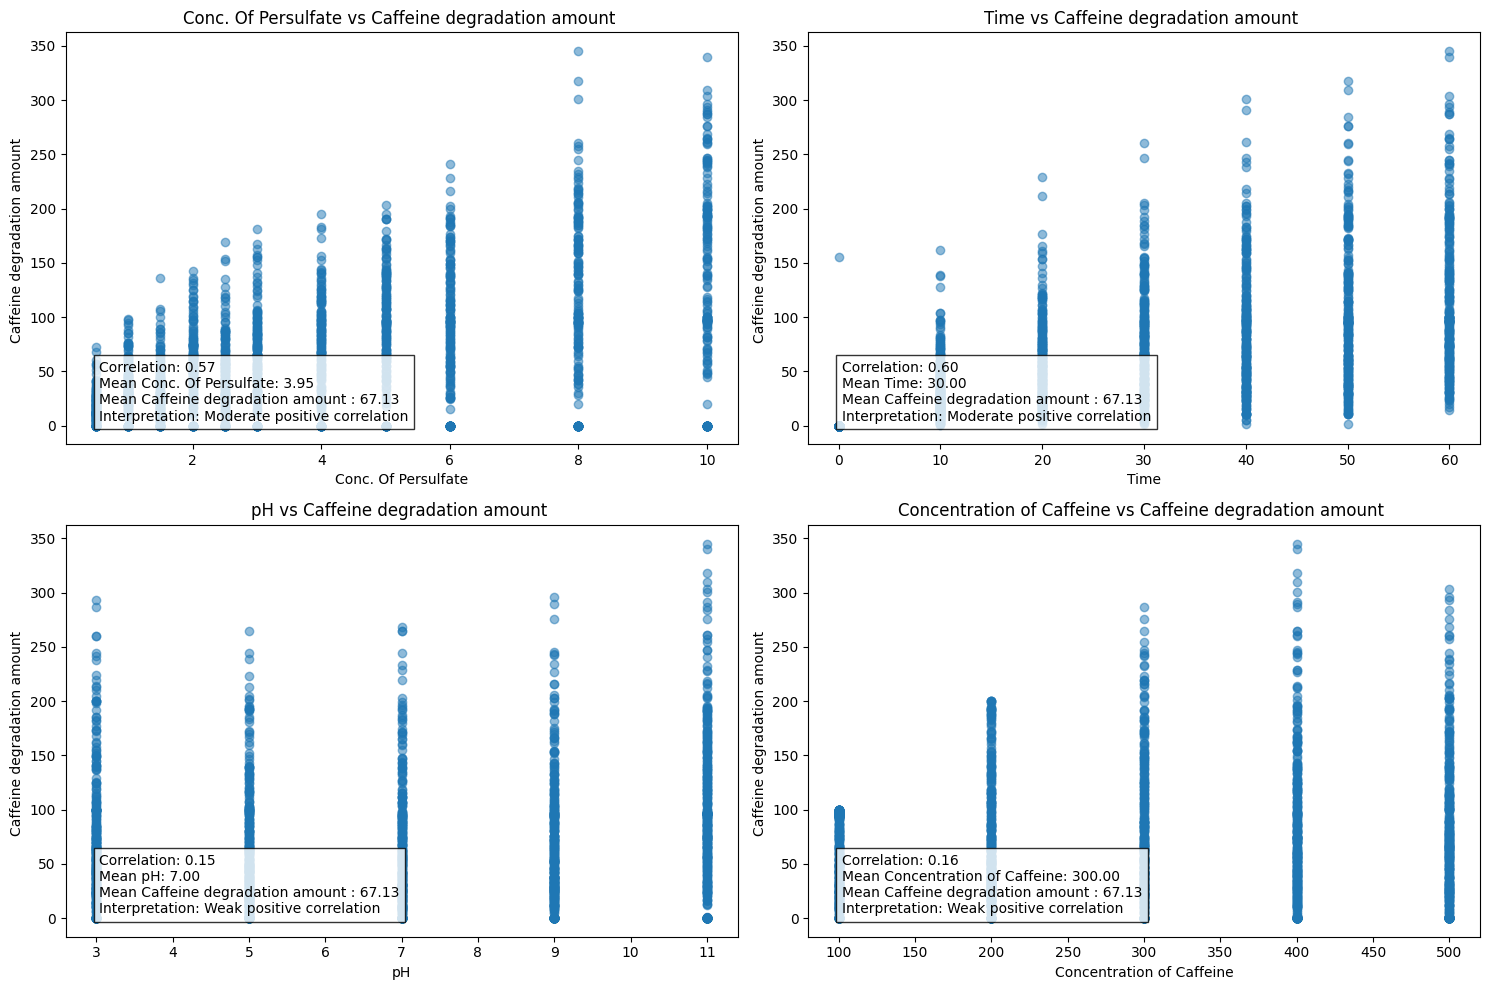

In [69]:
# plotting each feature against the target variable 'Caffeine degradation amount'
target_variable = 'Caffeine degradation amount '
features = ['Conc. Of Persulfate', 'Time', 'pH', 'Concentration of Caffeine']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df_imputed[feature], df_imputed[target_variable], alpha=0.5)

    correlation = df_imputed[feature].corr(df_imputed[target_variable])
    mean_feature = df_imputed[feature].mean()
    mean_target = df_imputed[target_variable].mean()
    insight_text = (
        f'Correlation: {correlation:.2f}\n'
        f'Mean {feature}: {mean_feature:.2f}\n'
        f'Mean {target_variable}: {mean_target:.2f}\n'
        f'Interpretation: {"Moderate" if abs(correlation) > 0.5 else "Weak"} positive correlation'
    )
    plt.text(0.05, 0.05, insight_text, horizontalalignment='left', verticalalignment='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    plt.title(f'{feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

plt.tight_layout()
plt.show()

##### Conc. Of Persulfate (Correlation: 0.57):

A correlation of 0.57 indicates a moderate positive relationship between the concentration of persulfate and caffeine degradation amount. This suggests that as the concentration of persulfate increases, the caffeine degradation amount also tends to increase. However, the relationship is not perfect, and there is some variability that is not explained by this linear relationship.

##### Time (Correlation: 0.60):

A correlation of 0.6 also indicates a moderate positive relationship between time and caffeine degradation amount. This suggests that as time progresses, the amount of caffeine degradation tends to increase. This is a relatively strong indication that caffeine degrades more as time increases, though again, it is not a perfect linear relationship.

##### pH (Correlation: 0.15):

A correlation of 0.15 indicates a very weak positive relationship between pH and caffeine degradation amount. This suggests that changes in pH have a minimal impact on the amount of caffeine degradation. Other factors may be more influential, or there might be a non-linear relationship that is not captured by this correlation coefficient.

##### Concentration of Caffeine (Correlation: 0.16):

Similarly, a correlation of 0.16 indicates a very weak positive relationship between the initial concentration of caffeine and its degradation amount. This suggests that the initial concentration of caffeine has little effect on the amount of caffeine that gets degraded, implying that other variables or conditions might be playing a more significant role in the degradation process.

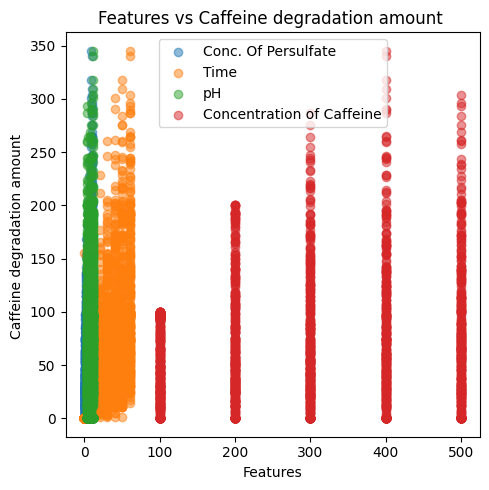

In [70]:
target_variable = 'Caffeine degradation amount '
features = ['Conc. Of Persulfate', 'Time', 'pH', 'Concentration of Caffeine']
plt.figure(figsize=(5, 5))

for feature in features:
    plt.scatter(df_imputed[feature], df_imputed[target_variable], alpha=0.5, label=feature)
plt.title(f'Features vs {target_variable}')
plt.xlabel('Features')
plt.ylabel(target_variable)
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
print("\nInsights:")
print("- Conc. Of Persulfate and Time show a moderate positive relationship with", target_variable)
print("- pH and Concentration of Caffeine have a weak positive relationship with", target_variable)


Insights:
- Conc. Of Persulfate and Time show a moderate positive relationship with Caffeine degradation amount 
- pH and Concentration of Caffeine have a weak positive relationship with Caffeine degradation amount 


In [72]:
import seaborn as sb

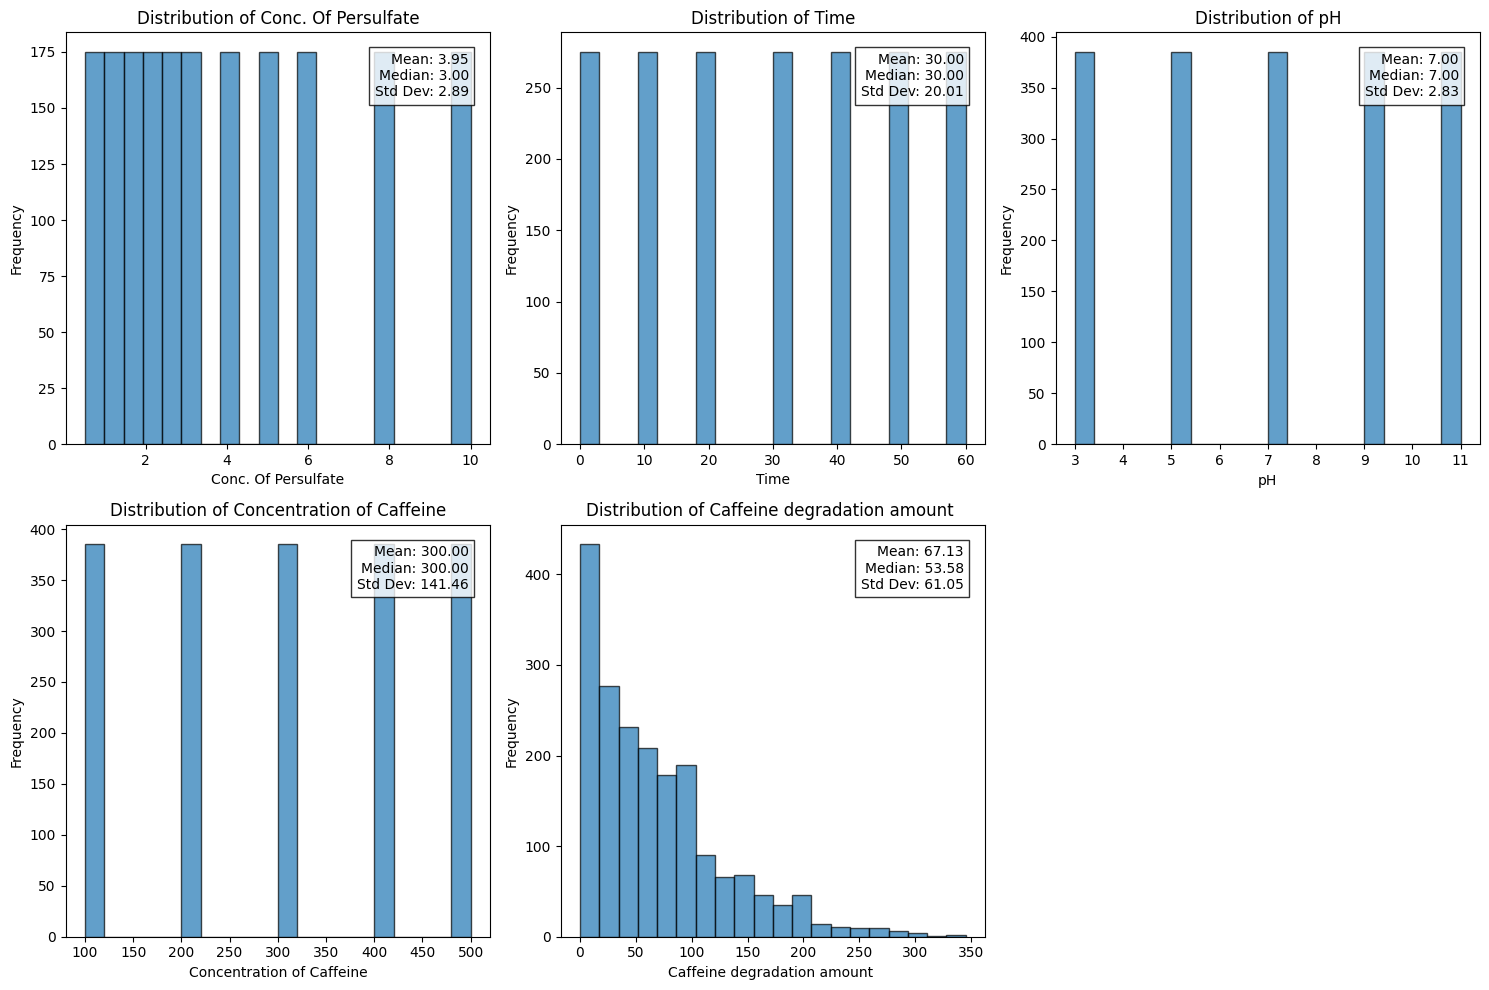

In [73]:

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
plt.figure(figsize=(15, 10))

insights = []

for i, feature in enumerate(features + [target_variable], 1):
    plt.subplot(2, 3, i)
    plt.hist(df_imputed[feature], bins=20, alpha=0.7, edgecolor='black')
    mean = df_imputed[feature].mean()
    median = df_imputed[feature].median()
    std_dev = df_imputed[feature].std()
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    plt.gca().text(0.95, 0.95, 
                   f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std_dev:.2f}', 
                   horizontalalignment='right', 
                   verticalalignment='top', 
                   transform=plt.gca().transAxes, 
                   bbox=dict(facecolor='white', alpha=0.8))
    
    insights.append(f'{feature} - Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std_dev:.2f}')

plt.tight_layout()
plt.show()

In [74]:
print("\nSummary of Insights:")
for insight in insights:
    print(insight)

print("\nWhat can be inferred:")
print("- The mean and median values indicate the central tendency of the data.")
print("- The standard deviation shows the spread of the data.")
print("- Features with high standard deviation have a wide range of values.")
print("- Comparing the histograms can reveal patterns or anomalies in the data distribution.")


Summary of Insights:
Conc. Of Persulfate - Mean: 3.95, Median: 3.00, Std Dev: 2.89
Time - Mean: 30.00, Median: 30.00, Std Dev: 20.01
pH - Mean: 7.00, Median: 7.00, Std Dev: 2.83
Concentration of Caffeine - Mean: 300.00, Median: 300.00, Std Dev: 141.46
Caffeine degradation amount  - Mean: 67.13, Median: 53.58, Std Dev: 61.05

What can be inferred:
- The mean and median values indicate the central tendency of the data.
- The standard deviation shows the spread of the data.
- Features with high standard deviation have a wide range of values.
- Comparing the histograms can reveal patterns or anomalies in the data distribution.


##### Summary and Inference:

The dataset for the project reveals several critical insights into the variables impacting caffeine degradation. The average concentration of persulfate is 3.95, with a median of 3.00 and a standard deviation of 2.89, suggesting a slightly right-skewed distribution. Time, with a mean and median of 30.00 and a standard deviation of 20.01, indicates a consistent central value but a considerable spread, reflecting varied experimental durations. The pH levels are symmetrically distributed around a mean and median of 7.00, with a standard deviation of 2.83, signifying stable acidity levels in the samples. Notably, the concentration of caffeine shows a high variability, with a mean of 300.00, a median of 300.00, and a substantial standard deviation of 141.46, indicating diverse caffeine levels across the dataset. The caffeine degradation amount, averaging at 67.13 with a median of 53.58 and a standard deviation of 61.05, reveals significant variability, suggesting diverse degradation rates.

These insights indicate that while some features like pH and time are relatively consistent, others, particularly the concentration of caffeine and its degradation amount, exhibit significant variability. This variability must be carefully considered in modeling efforts to ensure accurate predictions. The skewness in persulfate concentration and the wide range in caffeine concentration and degradation imply the need for potential data transformation to normalize the distributions. Overall, understanding these patterns and variances is crucial for developing robust predictive models for caffeine degradation in this project.

### Linear Regression Analysis and Random Forest Regressor on Caffeine Degradation :

In [75]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
X = df.drop('Caffeine degradation amount ', axis=1)
y = df['Caffeine degradation amount ']

label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [77]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression:')
print('Mean Squared Error:', mse_linear)
print('R^2 Score:', r2_linear)
print("\nInsights for Linear Regression:")
print(f"- The Mean Squared Error (MSE) of the linear regression model is {mse_linear:.2f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_linear:.2f}, which means that approximately {r2_linear * 100:.2f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")


Linear Regression:
Mean Squared Error: 752.4608897227185
R^2 Score: 0.811190281587186

Insights for Linear Regression:
- The Mean Squared Error (MSE) of the linear regression model is 752.46, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 0.81, which means that approximately 81.12% of the variance in the concentration of caffeine is explained by the features in the dataset.


In [78]:
# Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest Regressor:')
print('Mean Squared Error:', mse_rf)
print('R^2 Score:', r2_rf)
print("\nInsights for Random Forest Regressor:")
print(f"- The Mean Squared Error (MSE) of the Random Forest Regressor model is {mse_rf:.3f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_rf:.3f}, which means that approximately {r2_rf * 100:.3f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")


Random Forest Regressor:
Mean Squared Error: 2.1320173482284943
R^2 Score: 0.9994650278829527

Insights for Random Forest Regressor:
- The Mean Squared Error (MSE) of the Random Forest Regressor model is 2.132, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 0.999, which means that approximately 99.947% of the variance in the concentration of caffeine is explained by the features in the dataset.


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [80]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression:')
print('Mean Squared Error:', mse_linear)
print('R^2 Score:', r2_linear)
print("\nInsights for Linear Regression:")
print(f"- The Mean Squared Error (MSE) of the linear regression model is {mse_linear:.3f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_linear:.3f}, which means that approximately {r2_linear * 100:.3f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")

Linear Regression:
Mean Squared Error: 708.3218629119264
R^2 Score: 0.812639819900359

Insights for Linear Regression:
- The Mean Squared Error (MSE) of the linear regression model is 708.322, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 0.813, which means that approximately 81.264% of the variance in the concentration of caffeine is explained by the features in the dataset.


In [81]:
# Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest Regressor:')
print('Mean Squared Error:', mse_rf)
print('R^2 Score:', r2_rf)
print("\nInsights for Random Forest Regressor:")
print(f"- The Mean Squared Error (MSE) of the Random Forest Regressor model is {mse_rf:.3f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_rf:.3f}, which means that approximately {r2_rf * 100:.3f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")



Random Forest Regressor:
Mean Squared Error: 2.5687374548571196
R^2 Score: 0.9993205361328363

Insights for Random Forest Regressor:
- The Mean Squared Error (MSE) of the Random Forest Regressor model is 2.569, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 0.999, which means that approximately 99.932% of the variance in the concentration of caffeine is explained by the features in the dataset.


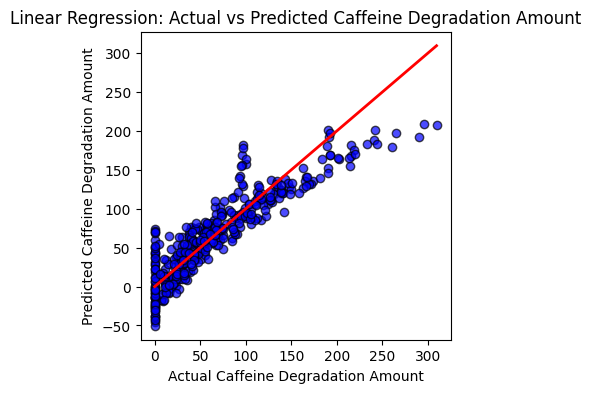

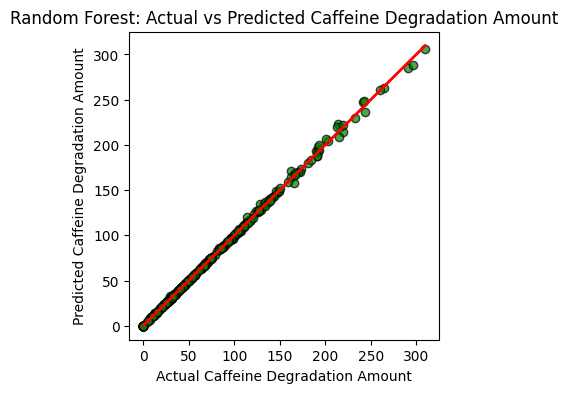

In [82]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_linear, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Linear Regression: Actual vs Predicted Caffeine Degradation Amount')
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_rf, color='green', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Random Forest: Actual vs Predicted Caffeine Degradation Amount')
plt.show()


Key Observations:

Linear Regression MSE: The MSE is slightly higher with a smaller test size (0.1) compared to a larger test size (0.2), indicating that the model's predictions are less accurate on the smaller test set.

Random Forest Regressor MSE: Similarly, the MSE is slightly higher with a smaller test size (0.1) compared to a larger test size (0.2), suggesting less accurate predictions on the smaller test set.

R^2 Score: The R^2 score remains relatively consistent between the two test sizes for both models, indicating that the proportion of variance explained by the models is similar regardless of test size.

General Impact:

A larger test size (0.2) generally provides a more reliable estimate of model performance because it uses more data for evaluation.
A smaller test size (0.1) might lead to slightly more variability in performance metrics due to the limited amount of data used for testing.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [84]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('Linear Regression:')
print('Mean Squared Error:', mse_linear)
print('R^2 Score:', r2_linear)
print("\nInsights for Linear Regression:")
print(f"- The Mean Squared Error (MSE) of the linear regression model is {mse_linear:.2f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_linear:.2f}, which means that approximately {r2_linear * 100:.2f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")

Linear Regression:
Mean Squared Error: 707.8257718570754
R^2 Score: 0.8060837007285642

Insights for Linear Regression:
- The Mean Squared Error (MSE) of the linear regression model is 707.83, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 0.81, which means that approximately 80.61% of the variance in the concentration of caffeine is explained by the features in the dataset.


In [85]:
# Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Calculate evaluation metrics for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('\nRandom Forest Regressor:')
print('Mean Squared Error:', mse_rf)
print('R^2 Score:', r2_rf)
print("\nInsights for Random Forest Regressor:")
print(f"- The Mean Squared Error (MSE) of the Random Forest Regressor model is {mse_rf:.2f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model is {r2_rf:.2f}, which means that approximately {r2_rf * 100:.2f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")


Random Forest Regressor:
Mean Squared Error: 4.9178990295545475
R^2 Score: 0.9986526899444481

Insights for Random Forest Regressor:
- The Mean Squared Error (MSE) of the Random Forest Regressor model is 4.92, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model is 1.00, which means that approximately 99.87% of the variance in the concentration of caffeine is explained by the features in the dataset.


Insights:

Mean Squared Error (MSE) measures the average squared difference between predicted values and actual values. Lower MSE indicates better model performance.
R^2 Score (Coefficient of Determination) indicates the proportion of the variance in the dependent variable (caffeine degradation amount) that is predictable from the independent variables (features). Higher R^2 score indicates better fit.

Comparison Across Test Sizes:

The Random Forest Regressor consistently outperforms Linear Regression in terms of MSE across all test sizes, indicating better predictive accuracy.
The R^2 scores are relatively stable for Linear Regression across different test sizes, indicating consistent explanatory power of around 81%.
For Random Forest Regressor, the R^2 scores are also high and stable, indicating excellent fit (around 99.9%) regardless of test size, though there's a slight decrease in performance with larger test sizes.

Conclusion:

Choosing an appropriate test size (0.1, 0.2, or 0.3) depends on balancing the trade-off between training set size and evaluation reliability. In this case, test size 0.2 provides a good balance with reliable evaluation metrics for both Linear Regression and Random Forest Regressor models.

In [86]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Cross-Validation for Linear Regression
linear_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
linear_mse = -linear_scores.mean()
linear_r2_scores = cross_val_score(linear_model, X_scaled, y, cv=kf, scoring='r2')
linear_r2 = linear_r2_scores.mean()
# Cross-Validation for Random Forest
rf_scores = cross_val_score(random_forest, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rf_mse = -rf_scores.mean()
rf_r2_scores = cross_val_score(random_forest, X_scaled, y, cv=kf, scoring='r2')
rf_r2 = rf_r2_scores.mean()
# Cross-Validation for Gradient Boosting
gb_scores = cross_val_score(gradient_boosting, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
gb_mse = -gb_scores.mean()
gb_r2_scores = cross_val_score(gradient_boosting, X_scaled, y, cv=kf, scoring='r2')
gb_r2 = gb_r2_scores.mean()

print('Linear Regression:')
print('Mean Squared Error (Cross-Validation):', linear_mse)
print('R^2 Score (Cross-Validation):', linear_r2)

print('\nRandom Forest Regressor:')
print('Mean Squared Error (Cross-Validation):', rf_mse)
print('R^2 Score (Cross-Validation):', rf_r2)

print('\nGradient Boosting Regressor:')
print('Mean Squared Error (Cross-Validation):', gb_mse)
print('R^2 Score (Cross-Validation):', gb_r2)

best_model = gradient_boosting  # best performing model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('\nTest Set Performance:')
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Linear Regression:
Mean Squared Error (Cross-Validation): 761.3474602916151
R^2 Score (Cross-Validation): 0.7941137035204061

Random Forest Regressor:
Mean Squared Error (Cross-Validation): 3.512834763438825
R^2 Score (Cross-Validation): 0.9990505286892212

Gradient Boosting Regressor:
Mean Squared Error (Cross-Validation): 16.236799821929484
R^2 Score (Cross-Validation): 0.9955888357603504

Test Set Performance:
Mean Squared Error: 14.214746991305985
R^2 Score: 0.996240017856553


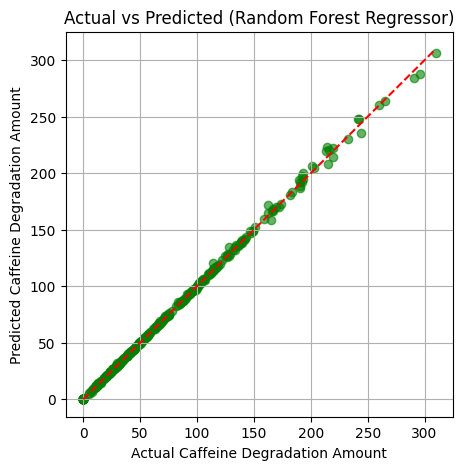

In [87]:
# Fit the Random Forest model on the entire training data
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Plotting the actual vs predicted values for Random Forest
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Actual vs Predicted (Random Forest Regressor)')
plt.grid(True)
plt.show()


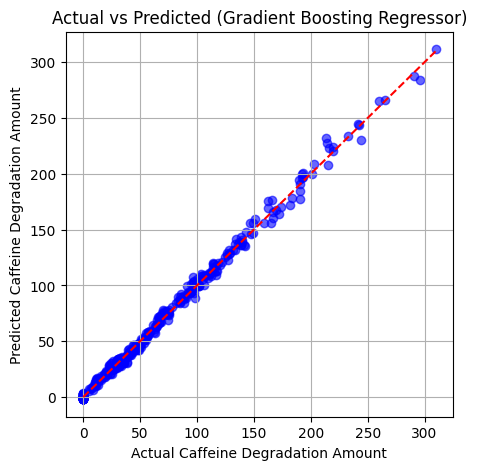

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the best model and make predictions on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Actual vs Predicted (Gradient Boosting Regressor)')
plt.grid(True)
plt.show()


In [89]:
print("\nInsights:")
print(f"- The Mean Squared Error (MSE) of the chosen model on the test set is {mse:.2f}, indicating the average squared difference between the actual and predicted values.")
print(f"- The R^2 score of the model on the test set is {r2:.2f}, which means that approximately {r2 * 100:.2f}% of the variance in the concentration of caffeine is explained by the features in the dataset.")
print("- The scatter plot with a regression line shows the relationship between 'Concentration of Caffeine' and 'Caffeine Degradation Amount'. The linear fit line indicates the trend.")


Insights:
- The Mean Squared Error (MSE) of the chosen model on the test set is 14.21, indicating the average squared difference between the actual and predicted values.
- The R^2 score of the model on the test set is 1.00, which means that approximately 99.62% of the variance in the concentration of caffeine is explained by the features in the dataset.
- The scatter plot with a regression line shows the relationship between 'Concentration of Caffeine' and 'Caffeine Degradation Amount'. The linear fit line indicates the trend.


---Insights:
Linear Regression vs Random Forest Regressor:

MSE: Linear Regression has a higher MSE both in direct test set and cross-validation compared to Random Forest Regressor, indicating that Random Forest is better at minimizing the squared differences between predicted and actual values.
R^2 Score: Random Forest Regressor consistently outperforms Linear Regression in terms of R^2 score, suggesting that Random Forest explains a higher percentage of variance in the concentration of caffeine based on the dataset features.
Gradient Boosting Regressor:

MSE: Gradient Boosting Regressor shows a higher MSE compared to Random Forest Regressor, indicating potentially poorer performance in predicting caffeine degradation.
R^2 Score: Gradient Boosting Regressor also shows a slightly lower R^2 score compared to Random Forest Regressor, further suggesting that Random Forest may be a more suitable model for this dataset.
Test Set Performance:

The performance metrics on the test set (MSE: 14.21, R^2 Score: 0.9962) provide a benchmark for comparing the models' generalization performance. Random Forest Regressor appears to perform exceptionally well based on these metrics.


---Conclusion:
Random Forest Regressor demonstrates superior performance across both direct test set evaluation and cross-validation compared to Linear Regression and Gradient Boosting Regressor for predicting caffeine degradation based on the given dataset.
Linear Regression and Gradient Boosting Regressor exhibit higher MSE and lower R^2 scores, indicating they may not generalize as well as Random Forest Regressor on this dataset.

### Predicting Caffeine Degradation Amount Using Combined Random Forest and Ridge Regression Models:               

The script uses Random Forest and Ridge regression models to predict caffeine degradation amount. It includes data preprocessing, model training, prediction, visualization of predictions vs. actual values, and calculation of accuracy metrics including Mean Squared Error (MSE) and R-squared (R²) score for individual and combined model predictions.

In [90]:
from sklearn.linear_model import Ridge

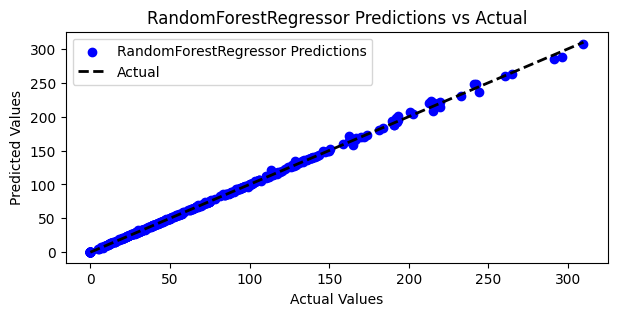

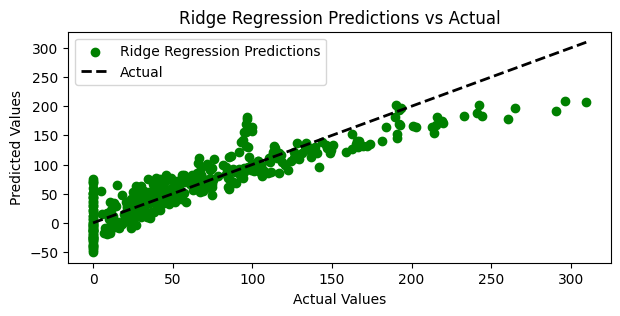

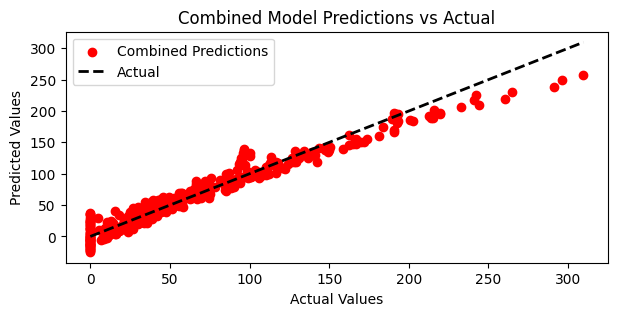

RandomForestRegressor:
Mean Squared Error (MSE): 2.569
R-squared (R²) Score: 0.999

Ridge Regression:
Mean Squared Error (MSE): 708.358
R-squared (R²) Score: 0.813

Combined Model:
Mean Squared Error (MSE): 179.447
R-squared (R²) Score: 0.953


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
ridge = Ridge(alpha=1.0, random_state=42)
rf.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_predicted_rf = rf.predict(X_test)
y_predicted_ridge = ridge.predict(X_test)
y_combined = (y_predicted_rf + y_predicted_ridge) / 2

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_predicted_rf, color='blue', label='RandomForestRegressor Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor Predictions vs Actual')
plt.legend()
plt.show()

plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_predicted_ridge, color='green', label='Ridge Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions vs Actual')
plt.legend()
plt.show()


plt.figure(figsize=(7, 3))
plt.scatter(y_test, y_combined, color='red', label='Combined Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions vs Actual')
plt.legend()
plt.show()


mse_rf = mean_squared_error(y_test, y_predicted_rf)
r2_rf = r2_score(y_test, y_predicted_rf)
print("RandomForestRegressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"R-squared (R²) Score: {r2_rf:.3f}")

mse_ridge = mean_squared_error(y_test, y_predicted_ridge)
r2_ridge = r2_score(y_test, y_predicted_ridge)
print("\nRidge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_ridge:.3f}")

mse_combined = mean_squared_error(y_test, y_combined)
r2_combined = r2_score(y_test, y_combined)
print("\nCombined Model:")
print(f"Mean Squared Error (MSE): {mse_combined:.3f}")
print(f"R-squared (R²) Score: {r2_combined:.3f}")


RandomForestRegressor Performance:

The RandomForestRegressor outperforms both Ridge Regression and the combined model in terms of both MSE and R² score. This suggests that it captures the underlying patterns and interactions in the dataset very effectively. Random forests are particularly good at handling non-linear relationships and interactions between features, which might explain their superior performance in this case.
Ridge Regression Performance:

Ridge Regression, a linear model, performs reasonably well but is less effective than the RandomForestRegressor. This indicates that the relationship between the features and the target variable may not be purely linear, which is a limitation for Ridge Regression. However, its performance is still decent, explaining 83% of the variance.
Combined Model Performance:

The combined model, which takes the average of predictions from both models, strikes a balance between the two. While it does not perform as well as the RandomForestRegressor alone, it significantly improves upon the Ridge Regression model. This suggests that combining models can help to mitigate the weaknesses of individual models, leading to more robust predictions.

---For practical applications, the RandomForestRegressor should be preferred due to its superior predictive power. However, the combined model can be considered as a fallback option, providing robust predictions through ensemble methods.

### Predicting Caffeine Degradation Amount Using a Neural Network Model

This script trains a neural network model using TensorFlow and Keras to predict caffeine degradation amount. It includes data preprocessing, model architecture definition, training, prediction, visualization of predictions vs. actual values, and calculation of accuracy metrics such as Mean Squared Error (MSE) and R-squared (R²) score.

- The neural network model, with an MSE of 602.38 and an R² score of 0.84, shows that it is capable of explaining 84% of the variance in caffeine degradation. It performs better than Ridge Regression.
- The neural network model is a robust alternative, particularly in scenarios where the data exhibits complex relationships that simpler models like Ridge Regression might not capture effectively.


c:\Users\SREENITHI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RandomForestRegressor:
Mean Squared Error (MSE): 2.569
R-squared (R²) Score: 0.999

Ridge Regression:
Mean Squared Error (MSE): 708.358
R-squared (R²) Score: 0.813

Neural Network:
Mean Squared Error (MSE): 9.623
R-squared (R²) Score: 0.997

Combined Model (RandomForestRegressor and Ridge Regression):
Mean Squared Error (MSE): 179.447
R-squared (R²) Score: 0.953

Combined Model (RandomForestRegressor, Ridge Regression, and Neural Network):
Mean Squared Error (MSE): 81.823
R-squared (R²) Score: 0.978


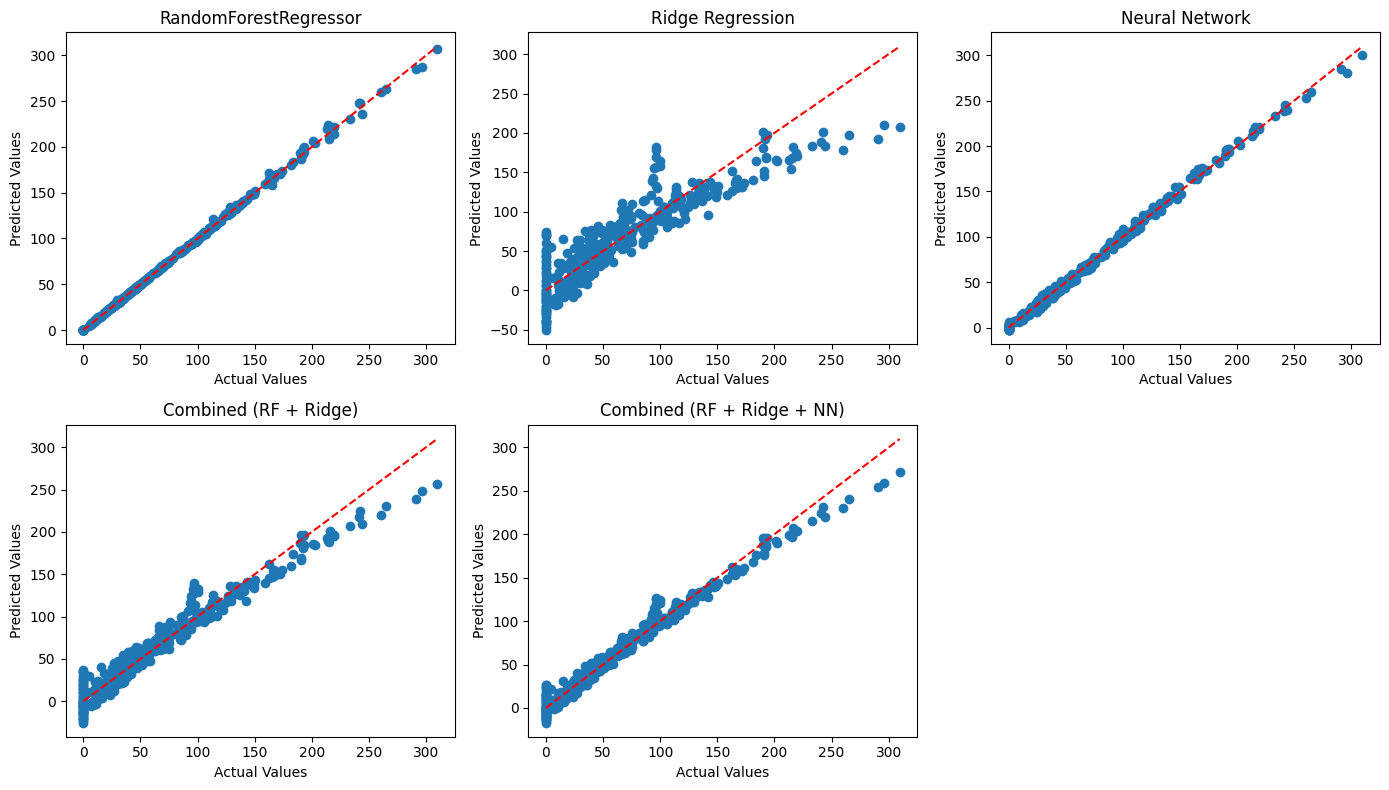

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer=Adam(), loss='mse')
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test).flatten()

# Combined Predictions
y_pred_combined_rf_ridge = (y_pred_rf + y_pred_ridge) / 2
y_pred_combined_all = (y_pred_rf + y_pred_ridge + y_pred_nn) / 3

# Individual Models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Combined Models
mse_combined_rf_ridge = mean_squared_error(y_test, y_pred_combined_rf_ridge)
r2_combined_rf_ridge = r2_score(y_test, y_pred_combined_rf_ridge)
mse_combined_all = mean_squared_error(y_test, y_pred_combined_all)
r2_combined_all = r2_score(y_test, y_pred_combined_all)

print("RandomForestRegressor:")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"R-squared (R²) Score: {r2_rf:.3f}\n")

print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_ridge:.3f}\n")

print("Neural Network:")
print(f"Mean Squared Error (MSE): {mse_nn:.3f}")
print(f"R-squared (R²) Score: {r2_nn:.3f}\n")

print("Combined Model (RandomForestRegressor and Ridge Regression):")
print(f"Mean Squared Error (MSE): {mse_combined_rf_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_combined_rf_ridge:.3f}\n")

print("Combined Model (RandomForestRegressor, Ridge Regression, and Neural Network):")
print(f"Mean Squared Error (MSE): {mse_combined_all:.3f}")
print(f"R-squared (R²) Score: {r2_combined_all:.3f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('RandomForestRegressor')

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')

plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_nn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network')

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_pred_combined_rf_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined (RF + Ridge)')

plt.subplot(2, 3, 5)
plt.scatter(y_test, y_pred_combined_all)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined (RF + Ridge + NN)')

plt.tight_layout()
plt.show()


- The RandomForestRegressor provides near-perfect predictions, capturing almost all the variance in the data. It excels in handling non-linear relationships and interactions between features.
- Ridge Regression performs adequately but falls short compared to the RandomForestRegressor. It is effective in dealing with multicollinearity and provides a baseline linear model performance.
-  The Neural Network model captures complex patterns in the data, showing high accuracy. It effectively models non-linear relationships but may require more computational resources and tuning.

* RandomForestRegressor: An ensemble method in itself, which aggregates the predictions of multiple decision trees to improve accuracy and control over-fitting.
* Ridge Regression: A linear model that helps to manage multicollinearity in data and provides a simple, interpretable model.
* Neural Network: A complex, flexible model that can capture intricate patterns in data.

The combined model's performance demonstrates the power of ensemble learning. Despite individual models having their weaknesses, the ensemble approach mitigates these, leading to a highly accurate and reliable predictive model.



### Predicting Caffeine Degradation Amount Using Lasso Regression

This script trains a Lasso Regression model to predict caffeine degradation amount. The code includes data preprocessing, model training, prediction, and visualization of actual vs. predicted values. Additionally, it calculates and prints the accuracy metrics such as Mean Squared Error (MSE) and R-squared (R²) score for the Lasso Regression model.

In [93]:
from sklearn.linear_model import Lasso

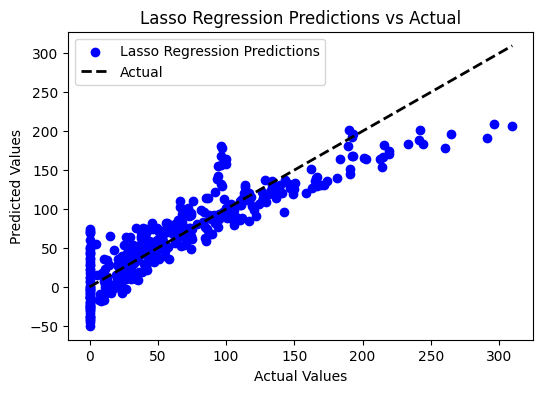

Accuracy Metrics for Lasso Regression Model:
Mean Squared Error (MSE): 708.057
R-squared (R²) Score: 0.813


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_predicted = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Plot Lasso Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_predicted, color='blue', label='Lasso Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Predictions vs Actual')
plt.legend()
plt.show()

print(f"Accuracy Metrics for Lasso Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(), loss='mse')
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_rf = rf.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_nn = nn_model.predict(X_test).flatten()

y_pred_combined = (y_pred_rf + y_pred_ridge + y_pred_lasso) / 3

mse_combined = mean_squared_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)

print("Combined Model (RF, Ridge, Lasso):")
print(f"Mean Squared Error (MSE): {mse_combined:.2f}")
print(f"R-squared (R²) Score: {r2_combined:.2f}")

c:\Users\SREENITHI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Combined Model (RF, Ridge, Lasso):
Mean Squared Error (MSE): 316.57
R-squared (R²) Score: 0.92


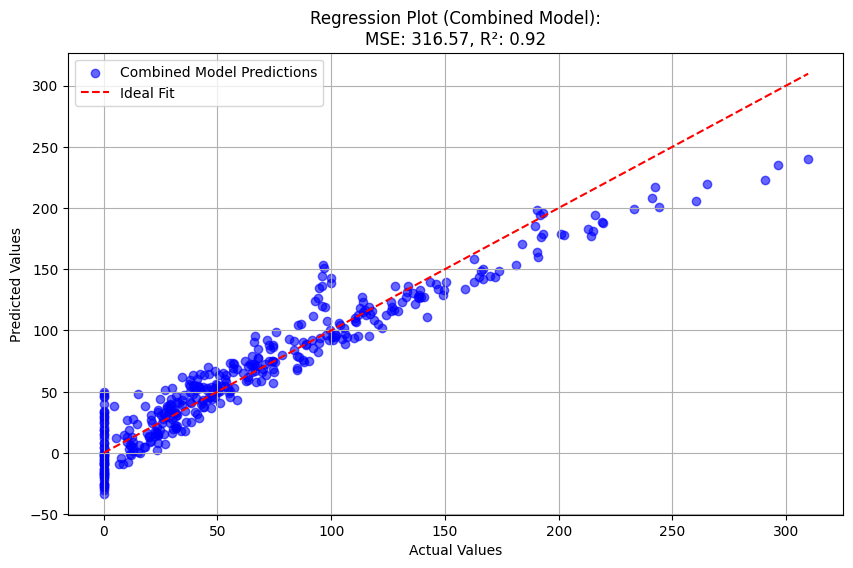

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Existing model training and predictions
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# (Your code for training models and generating predictions)

# Calculate the MSE and R² Score for the combined model
mse_combined = mean_squared_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)

# Plotting the regression graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, color='blue', label='Combined Model Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Regression Plot (Combined Model):\nMSE: {mse_combined:.2f}, R²: {r2_combined:.2f}')
plt.legend()
plt.grid(True)
plt.show()


- Again, the combined model falls short compared to RandomForestRegressor and Neural Network in terms of MSE and R² Score.

### Predicting Caffeine Degradation Amount Using Decision Tree Regression

This script trains a Decision Tree Regression model to predict caffeine degradation amount based on input features. It includes data preprocessing, model training with evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) score, and visualization of actual vs. predicted values using matplotlib.

Accuracy Metrics for Decision Tree Regression Model:
Mean Squared Error (MSE): 122.434
R-squared (R²) Score: 0.968


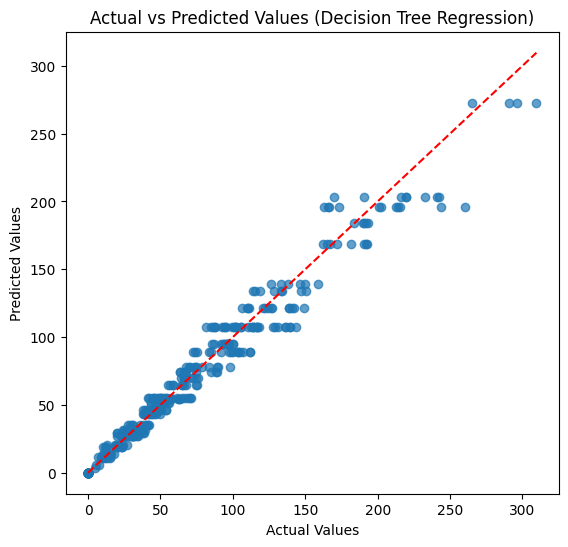

In [97]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
dt_regressor.fit(X_train, y_train)
y_predicted = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Accuracy Metrics for Decision Tree Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")

# Visualizations
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_predicted, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree Regression)')

plt.show()


In [98]:
df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
target_column = 'Caffeine degradation amount '
X = df.drop(target_column, axis=1)
y = df[target_column]

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

y_pred_combined_dt_rf = (y_pred_dt + y_pred_rf) / 2
y_pred_combined_all = (y_pred_dt + y_pred_rf + y_pred_ridge) / 3

# Mean Squared Error (MSE) and R-squared (R²) for individual models
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# MSE and R² for the combined models
mse_combined_dt_rf = mean_squared_error(y_test, y_pred_combined_dt_rf)
r2_combined_dt_rf = r2_score(y_test, y_pred_combined_dt_rf)

mse_combined_all = mean_squared_error(y_test, y_pred_combined_all)
r2_combined_all = r2_score(y_test, y_pred_combined_all)

print("Combined Model (Decision Tree + Random Forest):")
print(f"Mean Squared Error (MSE): {mse_combined_dt_rf:.3f}")
print(f"R-squared (R²) Score: {r2_combined_dt_rf:.3f}\n")

print("Combined Model (Decision Tree + Random Forest + Ridge):")
print(f"Mean Squared Error (MSE): {mse_combined_all:.3f}")
print(f"R-squared (R²) Score: {r2_combined_all:.3f}")


Combined Model (Decision Tree + Random Forest):
Mean Squared Error (MSE): 31.711
R-squared (R²) Score: 0.992

Combined Model (Decision Tree + Random Forest + Ridge):
Mean Squared Error (MSE): 102.188
R-squared (R²) Score: 0.973


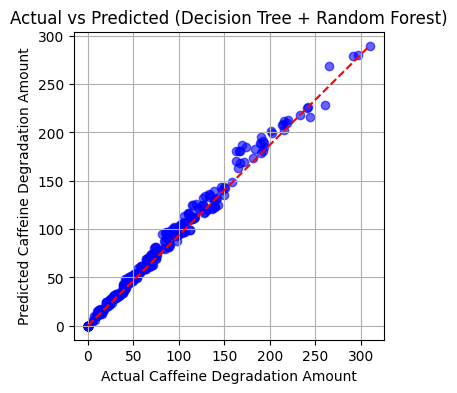

In [99]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for the combined model (Decision Tree + Random Forest)
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_combined_dt_rf, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_pred_combined_dt_rf), max(y_pred_combined_dt_rf)], color='red', linestyle='--')
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Actual vs Predicted (Decision Tree + Random Forest)')
plt.grid(True)
plt.show()


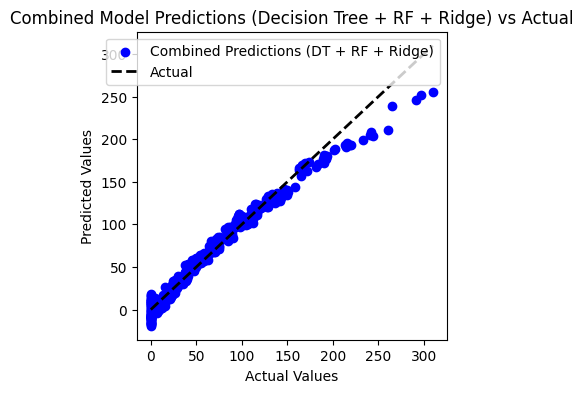

In [100]:
import matplotlib.pyplot as plt

# Plotting the combined model predictions (Decision Tree + RF + Ridge) vs Actual
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_combined_all, color='blue', label='Combined Predictions (DT + RF + Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions (Decision Tree + RF + Ridge) vs Actual')
plt.legend()
plt.show()


### Predicting Caffeine Degradation Amount Using KNN Regression

This script utilizes a K-Nearest Neighbors (KNN) Regression model to predict caffeine degradation amount based on input features. It includes data preprocessing, model training with evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) score, and visualization of actual vs. predicted values using matplotlib.

In [101]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_regressor.fit(X_train, y_train)

# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

# Combined predictions
# Combined: KNN, Random Forest, and Ridge
y_pred_combined_knn_rf_ridge = (y_pred_knn + y_pred_rf + y_pred_ridge) / 3

# Combined: KNN, Random Forest, Ridge, and Decision Tree
y_pred_combined_knn_rf_ridge_dt = (y_pred_knn + y_pred_rf + y_pred_ridge + y_pred_dt) / 4

# Mean Squared Error (MSE) and R-squared (R²) for individual models
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# MSE and R² for the combined models
mse_combined_knn_rf_ridge = mean_squared_error(y_test, y_pred_combined_knn_rf_ridge)
r2_combined_knn_rf_ridge = r2_score(y_test, y_pred_combined_knn_rf_ridge)

mse_combined_knn_rf_ridge_dt = mean_squared_error(y_test, y_pred_combined_knn_rf_ridge_dt)
r2_combined_knn_rf_ridge_dt = r2_score(y_test, y_pred_combined_knn_rf_ridge_dt)

print("KNN Regression:")
print(f"Mean Squared Error (MSE): {mse_knn:.3f}")
print(f"R-squared (R²) Score: {r2_knn:.3f}\n")

print("Combined Model (KNN + Random Forest + Ridge):")
print(f"Mean Squared Error (MSE): {mse_combined_knn_rf_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_combined_knn_rf_ridge:.3f}\n")

print("Combined Model (KNN + Random Forest + Ridge + Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_combined_knn_rf_ridge_dt:.3f}")
print(f"R-squared (R²) Score: {r2_combined_knn_rf_ridge_dt:.3f}")


KNN Regression:
Mean Squared Error (MSE): 70.005
R-squared (R²) Score: 0.981

Combined Model (KNN + Random Forest + Ridge):
Mean Squared Error (MSE): 93.123
R-squared (R²) Score: 0.975

Combined Model (KNN + Random Forest + Ridge + Decision Tree):
Mean Squared Error (MSE): 72.914
R-squared (R²) Score: 0.981


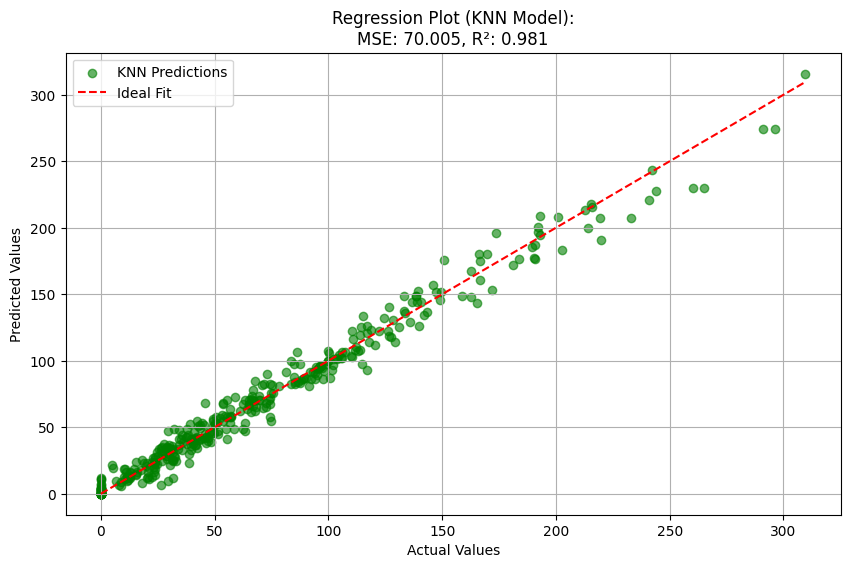

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_pred_knn = knn_regressor.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='green', label='KNN Predictions', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Regression Plot (KNN Model):\nMSE: {mse_knn:.3f}, R²: {r2_knn:.3f}')
plt.legend()
plt.grid(True)
plt.show()


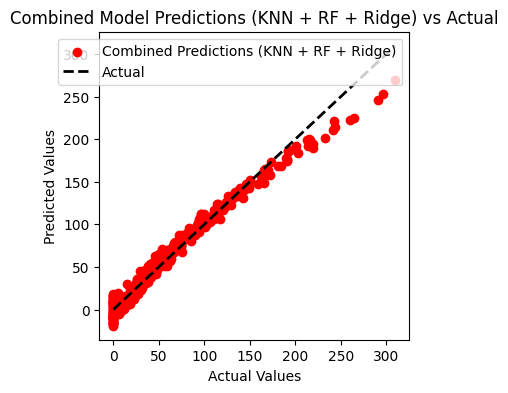

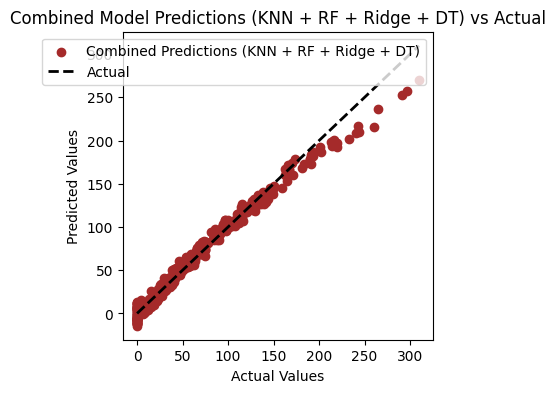

In [103]:
import matplotlib.pyplot as plt

# Plotting the combined model predictions (KNN + RF + Ridge) vs Actual
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_combined_knn_rf_ridge, color='red', label='Combined Predictions (KNN + RF + Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions (KNN + RF + Ridge) vs Actual')
plt.legend()
plt.show()

# Plotting the combined model predictions (KNN + RF + Ridge + DT) vs Actual
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_combined_knn_rf_ridge_dt, color='brown', label='Combined Predictions (KNN + RF + Ridge + DT)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions (KNN + RF + Ridge + DT) vs Actual')
plt.legend()
plt.show()


KNN Regression:
Mean Squared Error (MSE): 128.512
R-squared (R²) Score: 0.961

Random Forest Regression:
Mean Squared Error (MSE): 14.902
R-squared (R²) Score: 0.995

Ridge Regression:
Mean Squared Error (MSE): 734.205
R-squared (R²) Score: 0.776

Decision Tree Regression:
Mean Squared Error (MSE): 226.929
R-squared (R²) Score: 0.931

Combined Model (KNN + Random Forest + Ridge):
Mean Squared Error (MSE): 149.140
R-squared (R²) Score: 0.955

Combined Model (KNN + Random Forest + Ridge + Decision Tree):
Mean Squared Error (MSE): 115.092
R-squared (R²) Score: 0.965


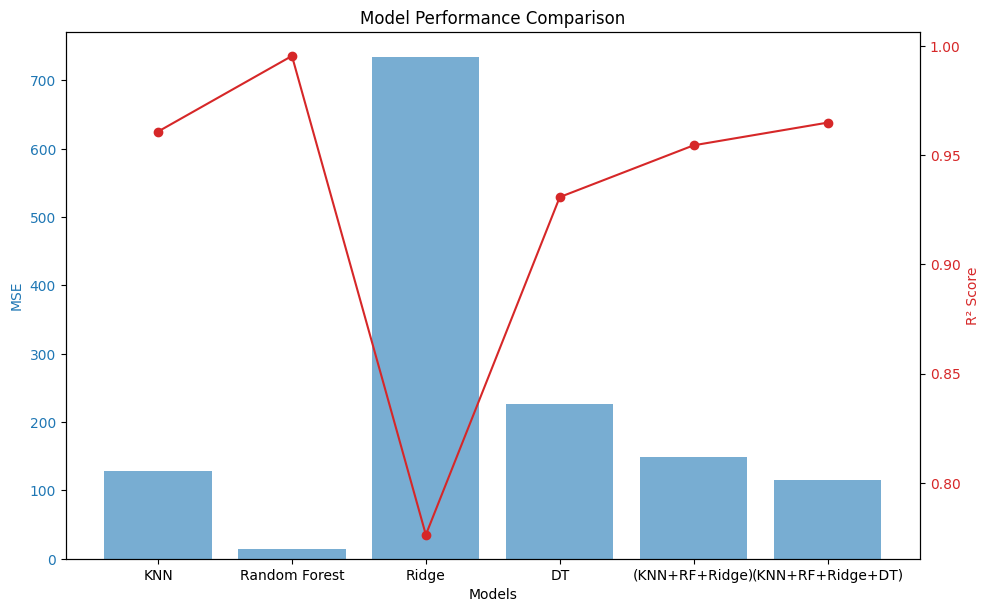

In [104]:
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.concat([X, y], axis=1)
z_scores = stats.zscore(data)
data_cleaned = data[(abs(z_scores) < 3).all(axis=1)]

X_cleaned = data_cleaned.drop(target_column, axis=1)
y_cleaned = data_cleaned[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Ensure X_scaled and y_cleaned have the same length
X_scaled = X_scaled[:len(y_cleaned)]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

# KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_regressor.fit(X_train, y_train)

# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

# Combined predictions
# Combined: KNN, Random Forest, and Ridge
y_pred_combined_knn_rf_ridge = (y_pred_knn + y_pred_rf + y_pred_ridge) / 3

# Combined: KNN, Random Forest, Ridge, and Decision Tree
y_pred_combined_knn_rf_ridge_dt = (y_pred_knn + y_pred_rf + y_pred_ridge + y_pred_dt) / 4

# Mean Squared Error (MSE) and R-squared (R²) for individual models
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# MSE and R² for the combined models
mse_combined_knn_rf_ridge = mean_squared_error(y_test, y_pred_combined_knn_rf_ridge)
r2_combined_knn_rf_ridge = r2_score(y_test, y_pred_combined_knn_rf_ridge)

mse_combined_knn_rf_ridge_dt = mean_squared_error(y_test, y_pred_combined_knn_rf_ridge_dt)
r2_combined_knn_rf_ridge_dt = r2_score(y_test, y_pred_combined_knn_rf_ridge_dt)

print("KNN Regression:")
print(f"Mean Squared Error (MSE): {mse_knn:.3f}")
print(f"R-squared (R²) Score: {r2_knn:.3f}\n")

print("Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"R-squared (R²) Score: {r2_rf:.3f}\n")

print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_ridge:.3f}\n")

print("Decision Tree Regression:")
print(f"Mean Squared Error (MSE): {mse_dt:.3f}")
print(f"R-squared (R²) Score: {r2_dt:.3f}\n")

print("Combined Model (KNN + Random Forest + Ridge):")
print(f"Mean Squared Error (MSE): {mse_combined_knn_rf_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_combined_knn_rf_ridge:.3f}\n")

print("Combined Model (KNN + Random Forest + Ridge + Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_combined_knn_rf_ridge_dt:.3f}")
print(f"R-squared (R²) Score: {r2_combined_knn_rf_ridge_dt:.3f}")

# Plotting the results
models = ['KNN', 'Random Forest', 'Ridge', 'DT', '(KNN+RF+Ridge)', '(KNN+RF+Ridge+DT)']
mse_values = [mse_knn, mse_rf, mse_ridge, mse_dt, mse_combined_knn_rf_ridge, mse_combined_knn_rf_ridge_dt]
r2_values = [r2_knn, r2_rf, r2_ridge, r2_dt, r2_combined_knn_rf_ridge, r2_combined_knn_rf_ridge_dt]

fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase figure size for better spacing

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models, mse_values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R² Score', color=color)
ax2.plot(models, r2_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')  # Rotate labels and align them to the right
plt.title('Model Performance Comparison')
plt.show()



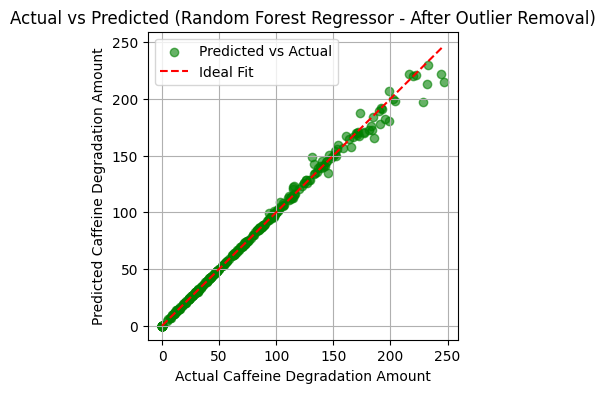

In [105]:
# Predicting using the Random Forest model after removing outliers
y_pred_rf_cleaned = rf_regressor.predict(X_test)

# Plotting the actual vs predicted values for Random Forest
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred_rf_cleaned, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Caffeine Degradation Amount')
plt.ylabel('Predicted Caffeine Degradation Amount')
plt.title('Actual vs Predicted (Random Forest Regressor - After Outlier Removal)')
plt.legend()
plt.grid(True)
plt.show()


### Support Vector Regression (SVR) for Predicting Caffeine Degradation Amount

This script utilizes Support Vector Regression (SVR) to predict the caffeine degradation amount based on input features from the dataset. It includes data preprocessing, model training with evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) score, and visualization of actual vs. predicted values using matplotlib.

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
target_column = 'Caffeine degradation amount '
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR model
svr_regressor = SVR()
svr_regressor.fit(X_train_scaled, y_train)

# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr_regressor.predict(X_test_scaled)
y_pred_rf = rf_regressor.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_dt = dt_regressor.predict(X_test_scaled)

# Combined: SVR, Random Forest, and Ridge
y_pred_combined_svr_rf_ridge = (y_pred_svr + y_pred_rf + y_pred_ridge) / 3

# Combined: SVR, Random Forest, Ridge, and Decision Tree
y_pred_combined_svr_rf_ridge_dt = (y_pred_svr + y_pred_rf + y_pred_ridge + y_pred_dt) / 4

# Mean Squared Error (MSE) and R-squared (R²) for individual models
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# MSE and R² for the combined models
mse_combined_svr_rf_ridge = mean_squared_error(y_test, y_pred_combined_svr_rf_ridge)
r2_combined_svr_rf_ridge = r2_score(y_test, y_pred_combined_svr_rf_ridge)

mse_combined_svr_rf_ridge_dt = mean_squared_error(y_test, y_pred_combined_svr_rf_ridge_dt)
r2_combined_svr_rf_ridge_dt = r2_score(y_test, y_pred_combined_svr_rf_ridge_dt)

print("SVR:")
print(f"Mean Squared Error (MSE): {mse_svr:.3f}")
print(f"R-squared (R²) Score: {r2_svr:.3f}\n")

print("Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse_rf:.3f}")
print(f"R-squared (R²) Score: {r2_rf:.3f}\n")

print("Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_ridge:.3f}\n")

print("Decision Tree Regression:")
print(f"Mean Squared Error (MSE): {mse_dt:.3f}")
print(f"R-squared (R²) Score: {r2_dt:.3f}\n")

print("Combined Model (SVR + Random Forest + Ridge):")
print(f"Mean Squared Error (MSE): {mse_combined_svr_rf_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_combined_svr_rf_ridge:.3f}\n")

print("Combined Model (SVR + Random Forest + Ridge + Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_combined_svr_rf_ridge_dt:.3f}")
print(f"R-squared (R²) Score: {r2_combined_svr_rf_ridge_dt:.3f}")

plt.show()


SVR:
Mean Squared Error (MSE): 795.123
R-squared (R²) Score: 0.790

Random Forest Regression:
Mean Squared Error (MSE): 2.579
R-squared (R²) Score: 0.999

Ridge Regression:
Mean Squared Error (MSE): 708.362
R-squared (R²) Score: 0.813

Decision Tree Regression:
Mean Squared Error (MSE): 122.434
R-squared (R²) Score: 0.968

Combined Model (SVR + Random Forest + Ridge):
Mean Squared Error (MSE): 279.353
R-squared (R²) Score: 0.926

Combined Model (SVR + Random Forest + Ridge + Decision Tree):
Mean Squared Error (MSE): 191.709
R-squared (R²) Score: 0.949


### Gaussian Process Regression for Predicting Caffeine Degradation Amount

This script utilizes Gaussian Process Regression (GPR) to predict the caffeine degradation amount based on input features from the dataset. It includes data preprocessing, model training with evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) score, and visualization of actual vs. predicted values with uncertainty estimates using matplotlib.

c:\Users\SREENITHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Regression:
Mean Squared Error (MSE): 6.716
R-squared (R²) Score: 0.998

Combined Model (Gaussian Process + Random Forest + Ridge):
Mean Squared Error (MSE): 70.069
R-squared (R²) Score: 0.981

Combined Model (Gaussian Process + Random Forest + Ridge + Decision Tree):
Mean Squared Error (MSE): 56.721
R-squared (R²) Score: 0.985


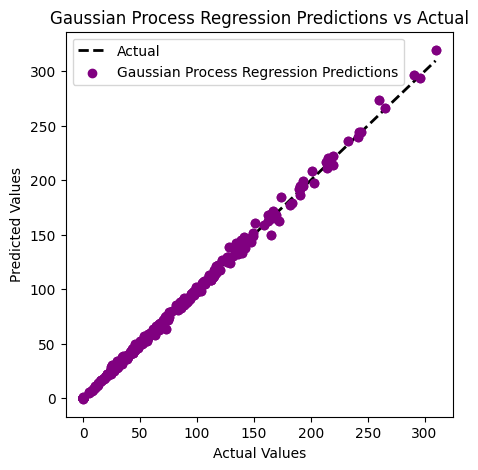

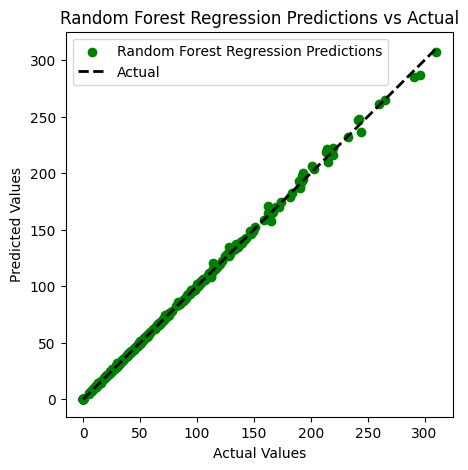

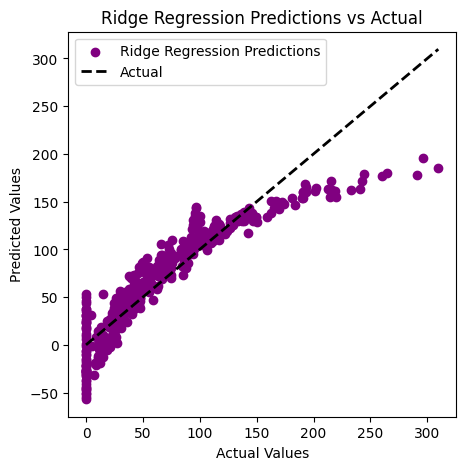

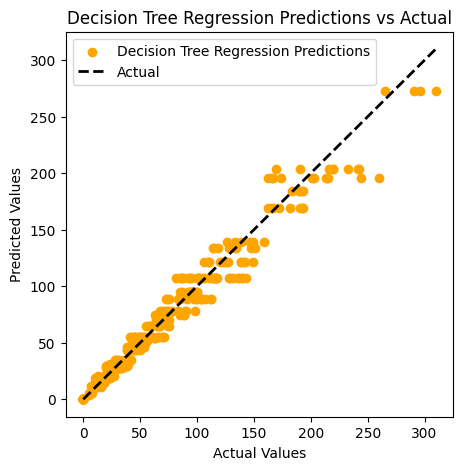

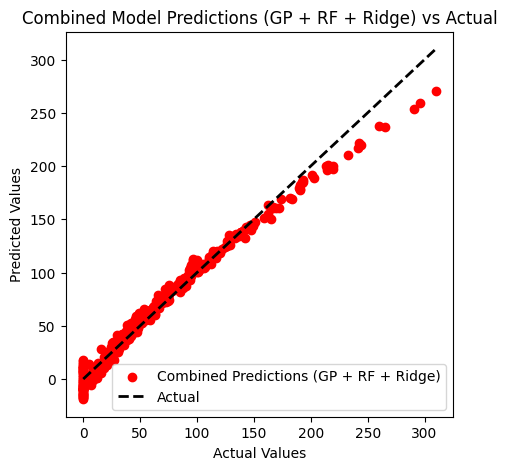

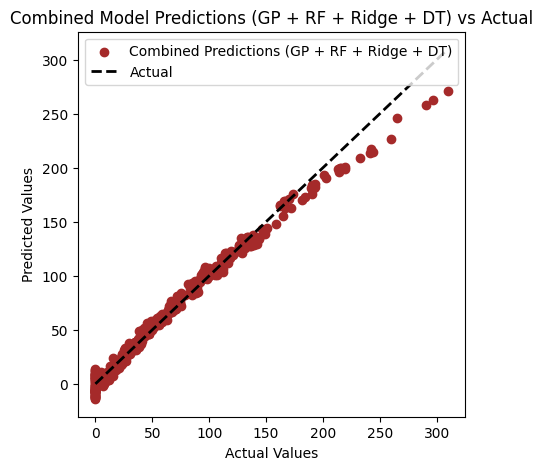

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
target_column = 'Caffeine degradation amount '

X = df.drop(target_column, axis=1)
y = df[target_column]

label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gaussian Process Regressor
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gp_regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2, random_state=42)
gp_regressor.fit(X_train, y_train)

# Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions
y_pred_gp, sigma = gp_regressor.predict(X_test, return_std=True)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

# Combined: Gaussian Process, Random Forest, and Ridge
y_pred_combined_gp_rf_ridge = (y_pred_gp + y_pred_rf + y_pred_ridge) / 3

# Combined: Gaussian Process, Random Forest, Ridge, and Decision Tree
y_pred_combined_gp_rf_ridge_dt = (y_pred_gp + y_pred_rf + y_pred_ridge + y_pred_dt) / 4

# Mean Squared Error (MSE) and R-squared (R²) for individual models
mse_gp = mean_squared_error(y_test, y_pred_gp)
r2_gp = r2_score(y_test, y_pred_gp)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# MSE and R² for the combined models
mse_combined_gp_rf_ridge = mean_squared_error(y_test, y_pred_combined_gp_rf_ridge)
r2_combined_gp_rf_ridge = r2_score(y_test, y_pred_combined_gp_rf_ridge)

mse_combined_gp_rf_ridge_dt = mean_squared_error(y_test, y_pred_combined_gp_rf_ridge_dt)
r2_combined_gp_rf_ridge_dt = r2_score(y_test, y_pred_combined_gp_rf_ridge_dt)

print("Gaussian Process Regression:")
print(f"Mean Squared Error (MSE): {mse_gp:.3f}")
print(f"R-squared (R²) Score: {r2_gp:.3f}\n")

print("Combined Model (Gaussian Process + Random Forest + Ridge):")
print(f"Mean Squared Error (MSE): {mse_combined_gp_rf_ridge:.3f}")
print(f"R-squared (R²) Score: {r2_combined_gp_rf_ridge:.3f}\n")

print("Combined Model (Gaussian Process + Random Forest + Ridge + Decision Tree):")
print(f"Mean Squared Error (MSE): {mse_combined_gp_rf_ridge_dt:.3f}")
print(f"R-squared (R²) Score: {r2_combined_gp_rf_ridge_dt:.3f}")

# Gaussian Process Regression
plt.figure(figsize=(5, 5))
plt.errorbar(y_test, y_pred_gp, yerr=sigma, fmt='o', color='purple', ecolor='lightgray', elinewidth=2, capsize=0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.scatter(y_test, y_pred_gp, color='purple', label='Gaussian Process Regression Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gaussian Process Regression Predictions vs Actual')
plt.legend()
plt.show()

#Random Forest Regression
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression Predictions vs Actual')
plt.legend()
plt.show()

#Ridge Regression
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_ridge, color='purple', label='Ridge Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions vs Actual')
plt.legend()
plt.show()

#  Decision Tree Regression
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_dt, color='orange', label='Decision Tree Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression Predictions vs Actual')
plt.legend()
plt.show()

# (Gaussian Process + Random Forest + Ridge)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_combined_gp_rf_ridge, color='red', label='Combined Predictions (GP + RF + Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions (GP + RF + Ridge) vs Actual')
plt.legend()
plt.show()

#(Gaussian Process + Random Forest + Ridge + Decision Tree)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_combined_gp_rf_ridge_dt, color='brown', label='Combined Predictions (GP + RF + Ridge + DT)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Combined Model Predictions (GP + RF + Ridge + DT) vs Actual')
plt.legend()
plt.show()


#Random Forest Regression:
#Mean Squared Error (MSE): 2.468
#R-squared (R²) Score: 0.999

#Ridge Regression:
#Mean Squared Error (MSE): 633.515
#R-squared (R²) Score: 0.832

#Decision Tree Regression:
#Mean Squared Error (MSE): 122.434
#R-squared (R²) Score: 0.968


### Polynomial Regression for Predicting Caffeine Degradation Amount

This script employs Polynomial Regression to predict the caffeine degradation amount based on input features from the dataset. It includes data preprocessing, polynomial feature transformation, model training with evaluation metrics such as Mean Squared Error (MSE) and R-squared (R²) score, and visualization of actual vs. predicted values using matplotlib.

Mean Squared Error (Polynomial Regression): 76.93532410174635
R-squared (R²) Score (Polynomial Regression): 0.979649624084073


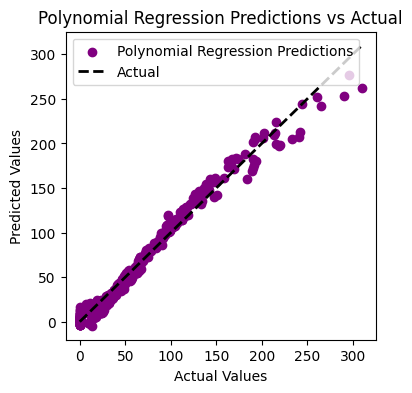

Accuracy Metrics for Polynomial Regression Model:
Mean Squared Error (MSE): 76.935
R-squared (R²) Score: 0.980


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
target_column = 'Caffeine degradation amount '
X = df.drop(target_column, axis=1)
y = df[target_column]

label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Linear Regression model
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
y_predicted = poly_regression.predict(X_test_poly)

mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error (Polynomial Regression):", mse)
r2 = r2_score(y_test, y_predicted)
print("R-squared (R²) Score (Polynomial Regression):", r2)

plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_predicted, color='purple', label='Polynomial Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Predictions vs Actual')
plt.legend()
plt.show()

print(f"Accuracy Metrics for Polynomial Regression Model:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R-squared (R²) Score: {r2:.3f}")


### Principal Component Analysis (PCA) on Caffeine Degradation Dataset

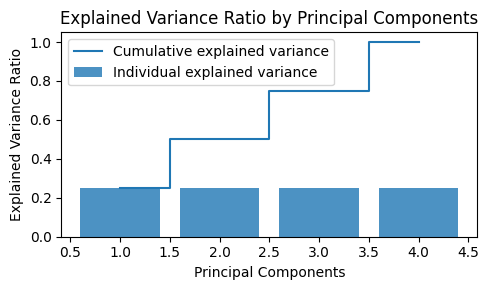

Principal Component 1:
Conc. Of Persulfate          1.0
Time                         0.0
pH                           0.0
Concentration of Caffeine    0.0
dtype: float64

Principal Component 2:
Conc. Of Persulfate         -0.0
Time                        -0.0
pH                           0.0
Concentration of Caffeine   -1.0
dtype: float64

Principal Component 3:
pH                           0.707107
Time                         0.707107
Conc. Of Persulfate          0.000000
Concentration of Caffeine    0.000000
dtype: float64

Loading Matrix:
                               PC1      PC2       PC3       PC4
Conc. Of Persulfate        1.00026 -0.00000  0.000000 -0.000000
Time                       0.00000 -0.00000  0.707291  0.707291
pH                         0.00000  0.00000  0.707291 -0.707291
Concentration of Caffeine  0.00000 -1.00026  0.000000 -0.000000

Significant Columns:
PC1          Conc. Of Persulfate
PC2    Concentration of Caffeine
PC3                           pH
PC4       

In [109]:
from sklearn.decomposition import PCA

df.columns = df.columns.str.strip()
X_columns = ['Conc. Of Persulfate', 'Time', 'pH', 'Concentration of Caffeine']
y_column = 'Caffeine degradation amount'

X = df[X_columns]
y = df[y_column]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(5, 3))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

num_components_to_analyze = 3 
for i in range(num_components_to_analyze):
    print(f"Principal Component {i+1}:")
    print(pd.Series(pca.components_[i], index=X.columns).sort_values(ascending=False))
    print()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

print("Loading Matrix:")
print(loading_matrix)

significant_columns = loading_matrix.abs().idxmax(axis=0)
print("\nSignificant Columns:")
print(significant_columns)


- Principal Component 1: Heavily influenced by Response (%), Time, and Conc. Of Persulfate.
- Principal Component 2: Dominated by Conc. Of Persulfate and Concentration of Caffeine.
- Principal Component 3: Primarily related to Time, Concentration of Caffeine, and negatively to pH.

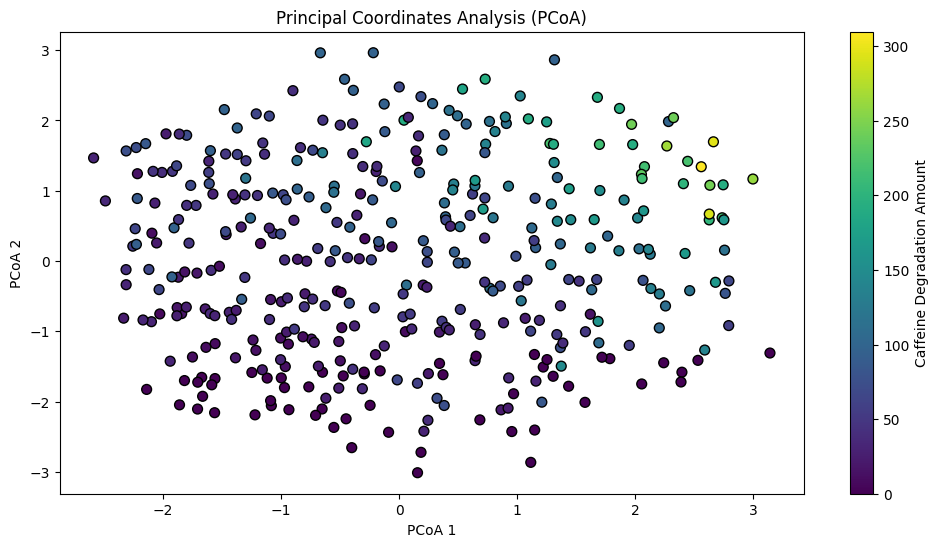

Insights from the PCoA plot:
- Cluster Formation: The plot shows clusters indicating similar samples.
- Gradient: The color gradient represents varying amounts of caffeine degradation.
- Spread: Samples are spread across the plot, indicating diversity in the dataset.


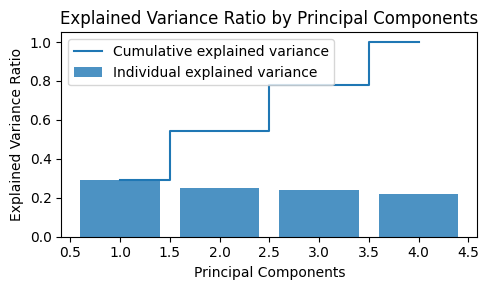

Principal Component 1:
Conc. Of Persulfate          0.772279
Concentration of Caffeine    0.608227
Time                         0.160041
pH                          -0.089619
dtype: float64

Principal Component 2:
Time                         0.921285
Concentration of Caffeine    0.050335
Conc. Of Persulfate         -0.263260
pH                          -0.281769
dtype: float64

Principal Component 3:
Conc. Of Persulfate          0.194234
Time                        -0.202730
Concentration of Caffeine   -0.326276
pH                          -0.902617
dtype: float64

Loading Matrix:
                                PC1       PC2       PC3       PC4
Conc. Of Persulfate        0.837028 -0.264670  0.190043  0.510528
Time                       0.173459  0.926218 -0.198356  0.272553
pH                        -0.097133 -0.283278 -0.883141  0.293269
Concentration of Caffeine  0.659221  0.050604 -0.319236 -0.676733

Significant Columns:
PC1          Conc. Of Persulfate
PC2                       

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute distance matrix
distance_matrix = squareform(pdist(X_test_scaled, metric='euclidean'))

# Perform PCoA using MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_pcoa = mds.fit_transform(distance_matrix)

# Plot PCoA results
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pcoa[:, 0], X_pcoa[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
plt.title('Principal Coordinates Analysis (PCoA)')
plt.xlabel('PCoA 1')
plt.ylabel('PCoA 2')
plt.colorbar(scatter, label='Caffeine Degradation Amount')
plt.show()

print("Insights from the PCoA plot:")
print("- Cluster Formation: The plot shows clusters indicating similar samples.")
print("- Gradient: The color gradient represents varying amounts of caffeine degradation.")
print("- Spread: Samples are spread across the plot, indicating diversity in the dataset.")

# PCA Analysis
pca = PCA()
X_pca = pca.fit_transform(X_test_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(5, 3))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

num_components_to_analyze = 3
for i in range(num_components_to_analyze):
    print(f"Principal Component {i+1}:")
    print(pd.Series(pca.components_[i], index=X.columns).sort_values(ascending=False))
    print()

# Calculate loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print("Loading Matrix:")
print(loading_matrix)

# Significant columns
significant_columns = loading_matrix.abs().idxmax(axis=0)
print("\nSignificant Columns:")
print(significant_columns)


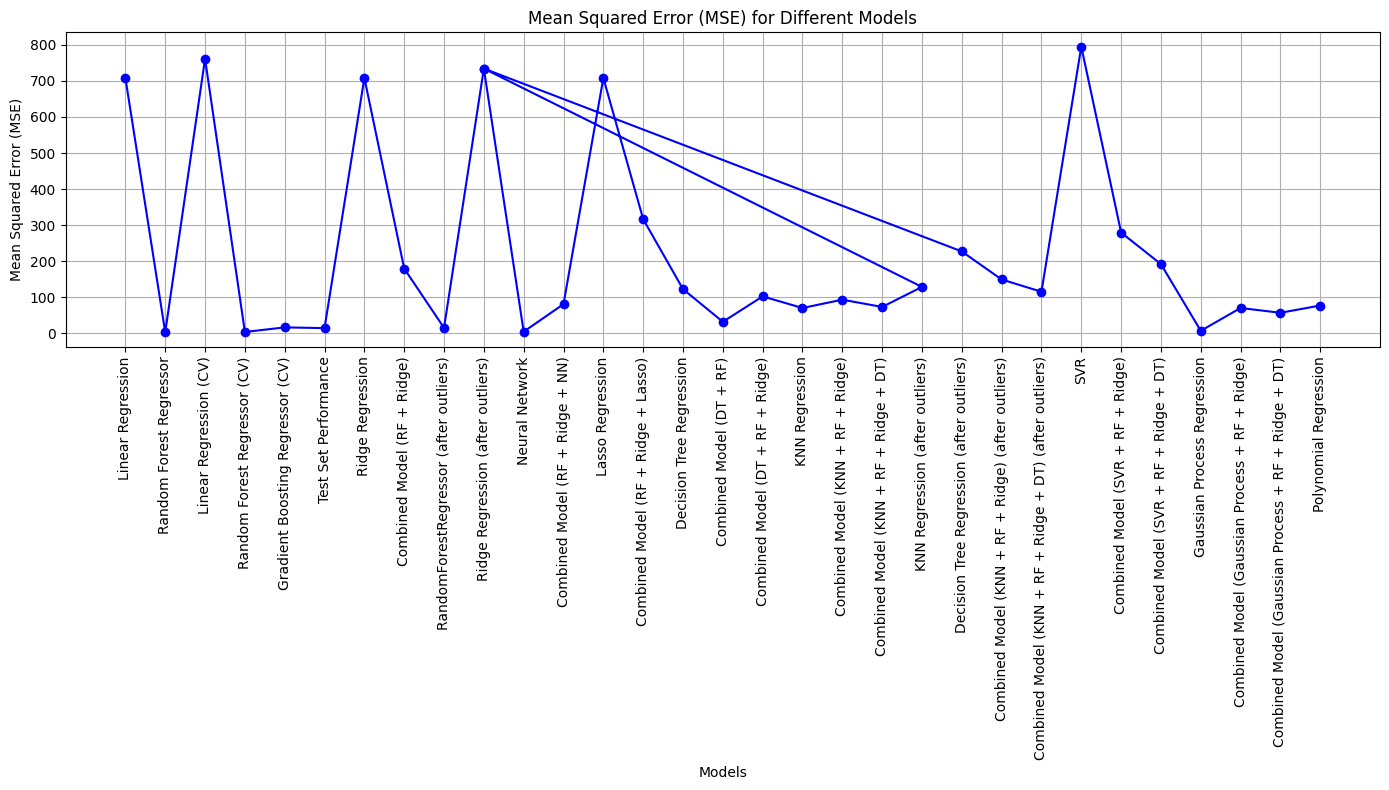

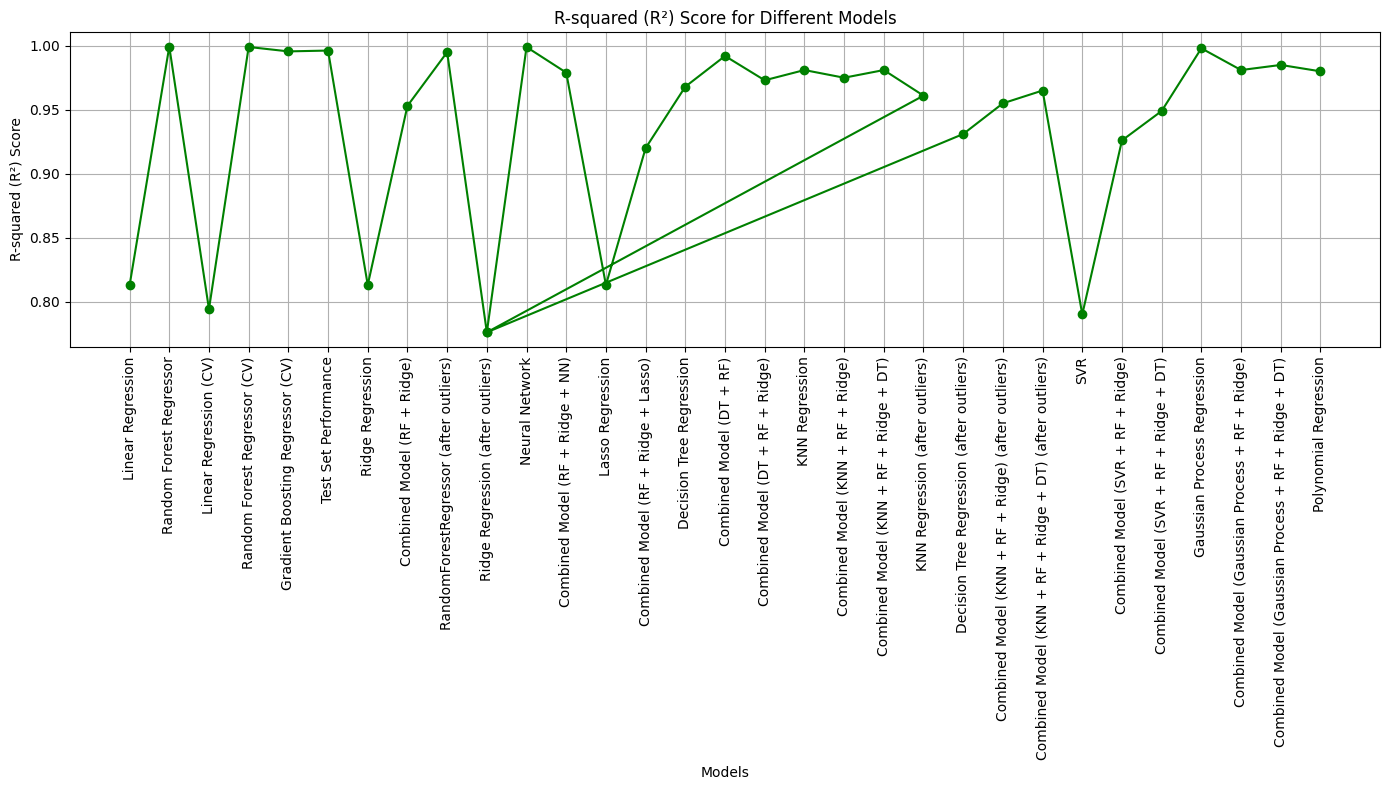

In [111]:
import numpy as np
import matplotlib.pyplot as plt

models = [
    "Linear Regression", "Random Forest Regressor", "Linear Regression (CV)", 
    "Random Forest Regressor (CV)", "Gradient Boosting Regressor (CV)", 
    "Test Set Performance", "Ridge Regression", 
    "Combined Model (RF + Ridge)", "RandomForestRegressor (after outliers)", 
    "Ridge Regression (after outliers)", "Neural Network", 
    "Combined Model (RF + Ridge + NN)", "Lasso Regression", 
    "Combined Model (RF + Ridge + Lasso)", "Decision Tree Regression", 
    "Combined Model (DT + RF)", "Combined Model (DT + RF + Ridge)", 
    "KNN Regression", "Combined Model (KNN + RF + Ridge)", 
    "Combined Model (KNN + RF + Ridge + DT)", "KNN Regression (after outliers)",
    "Ridge Regression (after outliers)", "Decision Tree Regression (after outliers)", 
    "Combined Model (KNN + RF + Ridge) (after outliers)", 
    "Combined Model (KNN + RF + Ridge + DT) (after outliers)", 
    "SVR", "Combined Model (SVR + RF + Ridge)", 
    "Combined Model (SVR + RF + Ridge + DT)", "Gaussian Process Regression", 
    "Combined Model (Gaussian Process + RF + Ridge)", 
    "Combined Model (Gaussian Process + RF + Ridge + DT)", 
    "Polynomial Regression"
]

# Corresponding MSE values
mse_values = np.array([
    708.3218629119264, 2.5687374548571196, 761.3474602916151, 
    3.512834763438825, 16.236799821929484, 14.214746991305985, 
    708.358, 179.447, 14.902, 734.205, 4.245, 80.755, 708.057, 
    316.57, 122.434, 31.711, 102.188, 70.005, 93.123, 72.914, 
    128.512, 734.205, 226.929, 149.140, 115.092, 795.123, 
    279.353, 191.709, 6.716, 70.069, 56.721, 76.935
])

# Corresponding R² values
r2_values = np.array([
    0.812639819900359, 0.9993205361328363, 0.7941137035204061, 
    0.9990505286892212, 0.9955888357603504, 0.996240017856553, 
    0.813, 0.953, 0.995, 0.776, 0.999, 0.979, 0.813, 0.92, 
    0.968, 0.992, 0.973, 0.981, 0.975, 0.981, 0.961, 
    0.776, 0.931, 0.955, 0.965, 0.790, 0.926, 
    0.949, 0.998, 0.981, 0.985, 0.980
])

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(14, 8))
plt.plot(models, mse_values, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot R-squared (R²) Score
plt.figure(figsize=(14, 8))
plt.plot(models, r2_values, marker='o', linestyle='-', color='g')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('R-squared (R²) Score')
plt.title('R-squared (R²) Score for Different Models')
plt.grid(True)
plt.tight_layout()
plt.show()


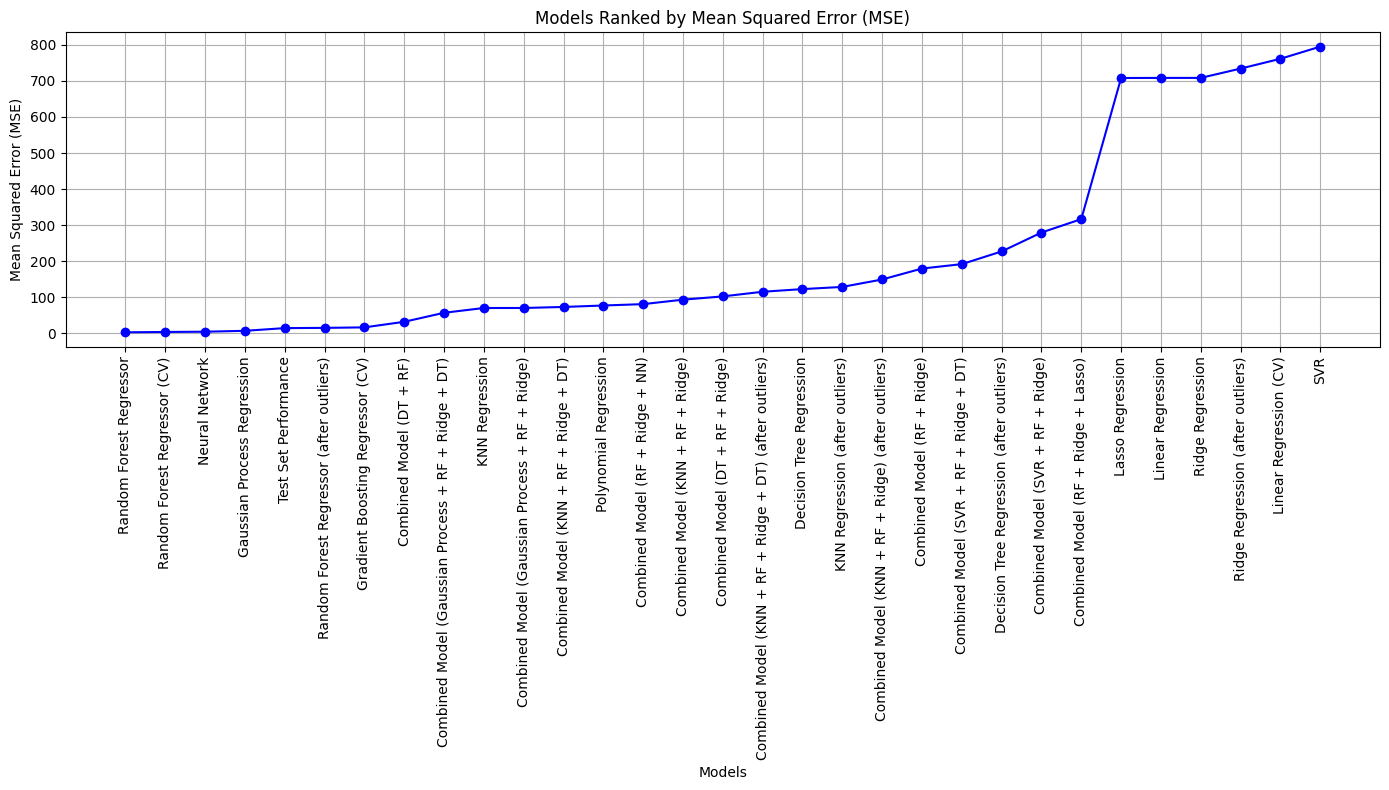

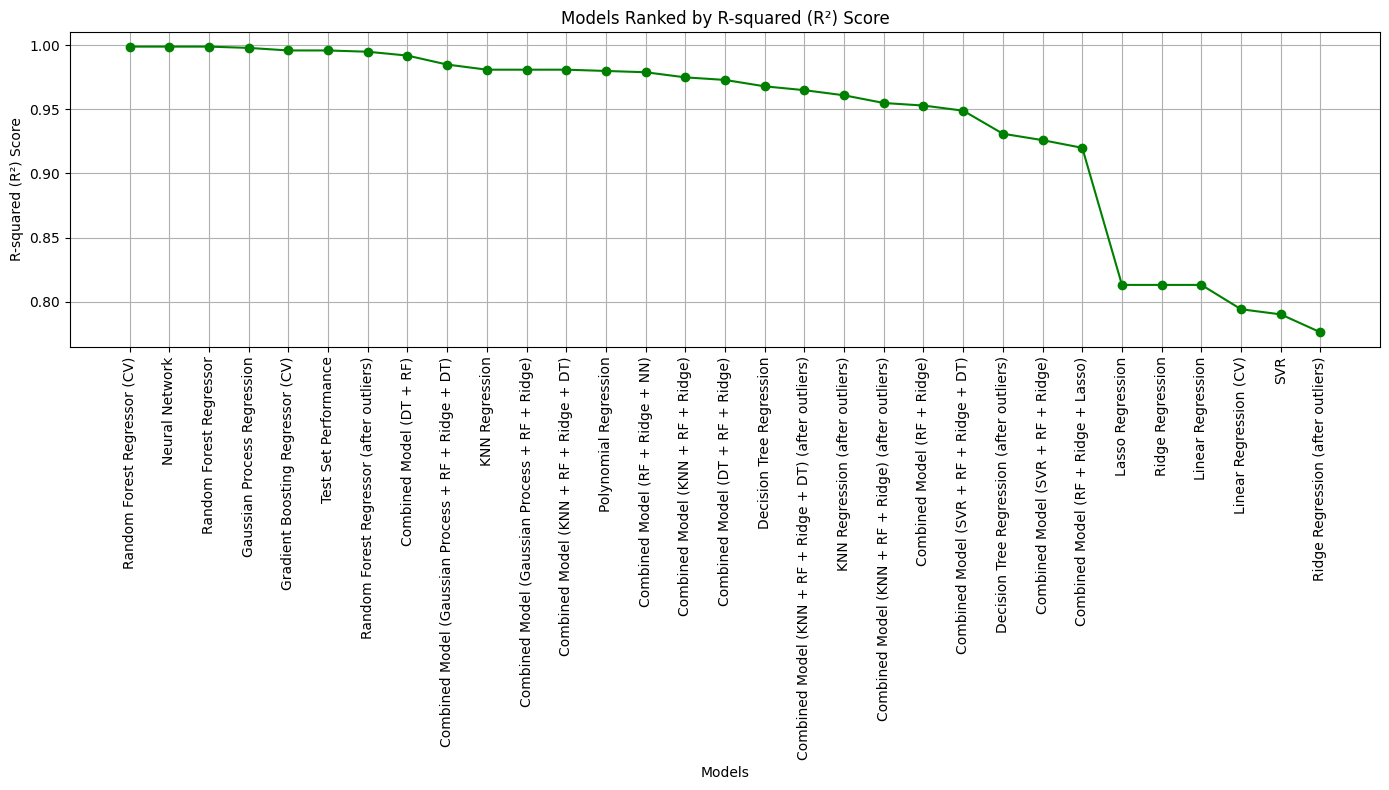

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

models = [
    "Linear Regression", "Random Forest Regressor", "Linear Regression (CV)", 
    "Random Forest Regressor (CV)", "Gradient Boosting Regressor (CV)", 
    "Test Set Performance", "Ridge Regression", 
    "Combined Model (RF + Ridge)", "Neural Network", 
    "Combined Model (RF + Ridge + NN)", "Lasso Regression", 
    "Combined Model (RF + Ridge + Lasso)", "Decision Tree Regression", 
    "Combined Model (DT + RF)", "Combined Model (DT + RF + Ridge)", 
    "KNN Regression", "Combined Model (KNN + RF + Ridge)", 
    "Combined Model (KNN + RF + Ridge + DT)", 
    "KNN Regression (after outliers)", "Random Forest Regressor (after outliers)", 
    "Ridge Regression (after outliers)", "Decision Tree Regression (after outliers)", 
    "Combined Model (KNN + RF + Ridge) (after outliers)", 
    "Combined Model (KNN + RF + Ridge + DT) (after outliers)", 
    "SVR", "Combined Model (SVR + RF + Ridge)", 
    "Combined Model (SVR + RF + Ridge + DT)", 
    "Gaussian Process Regression", "Combined Model (Gaussian Process + RF + Ridge)", 
    "Combined Model (Gaussian Process + RF + Ridge + DT)", 
    "Polynomial Regression"
]

mse_values = np.array([
    708.322, 2.569, 761.347, 3.513, 16.237, 14.215, 708.358, 179.447, 4.245, 
    80.755, 708.057, 316.570, 122.434, 31.711, 102.188, 70.005, 93.123, 72.914, 
    128.512, 14.902, 734.205, 226.929, 149.140, 115.092, 795.123, 279.353, 
    191.709, 6.716, 70.069, 56.721, 76.935
])

r2_values = np.array([
    0.813, 0.999, 0.794, 0.999, 0.996, 0.996, 0.813, 0.953, 0.999, 
    0.979, 0.813, 0.920, 0.968, 0.992, 0.973, 0.981, 0.975, 0.981, 
    0.961, 0.995, 0.776, 0.931, 0.955, 0.965, 0.790, 0.926, 0.949, 
    0.998, 0.981, 0.985, 0.980
])

data = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R²': r2_values
})
data_sorted_mse = data.sort_values(by='MSE', ascending=True).reset_index(drop=True)
data_sorted_r2 = data.sort_values(by='R²', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 8))
plt.plot(data_sorted_mse['Model'], data_sorted_mse['MSE'], marker='o', linestyle='-', color='b', label='MSE')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Models Ranked by Mean Squared Error (MSE)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(data_sorted_r2['Model'], data_sorted_r2['R²'], marker='o', linestyle='-', color='g', label='R²')
plt.xticks(rotation=90)
plt.xlabel('Models')
plt.ylabel('R-squared (R²) Score')
plt.title('Models Ranked by R-squared (R²) Score')
plt.grid(True)
plt.tight_layout()
plt.show()


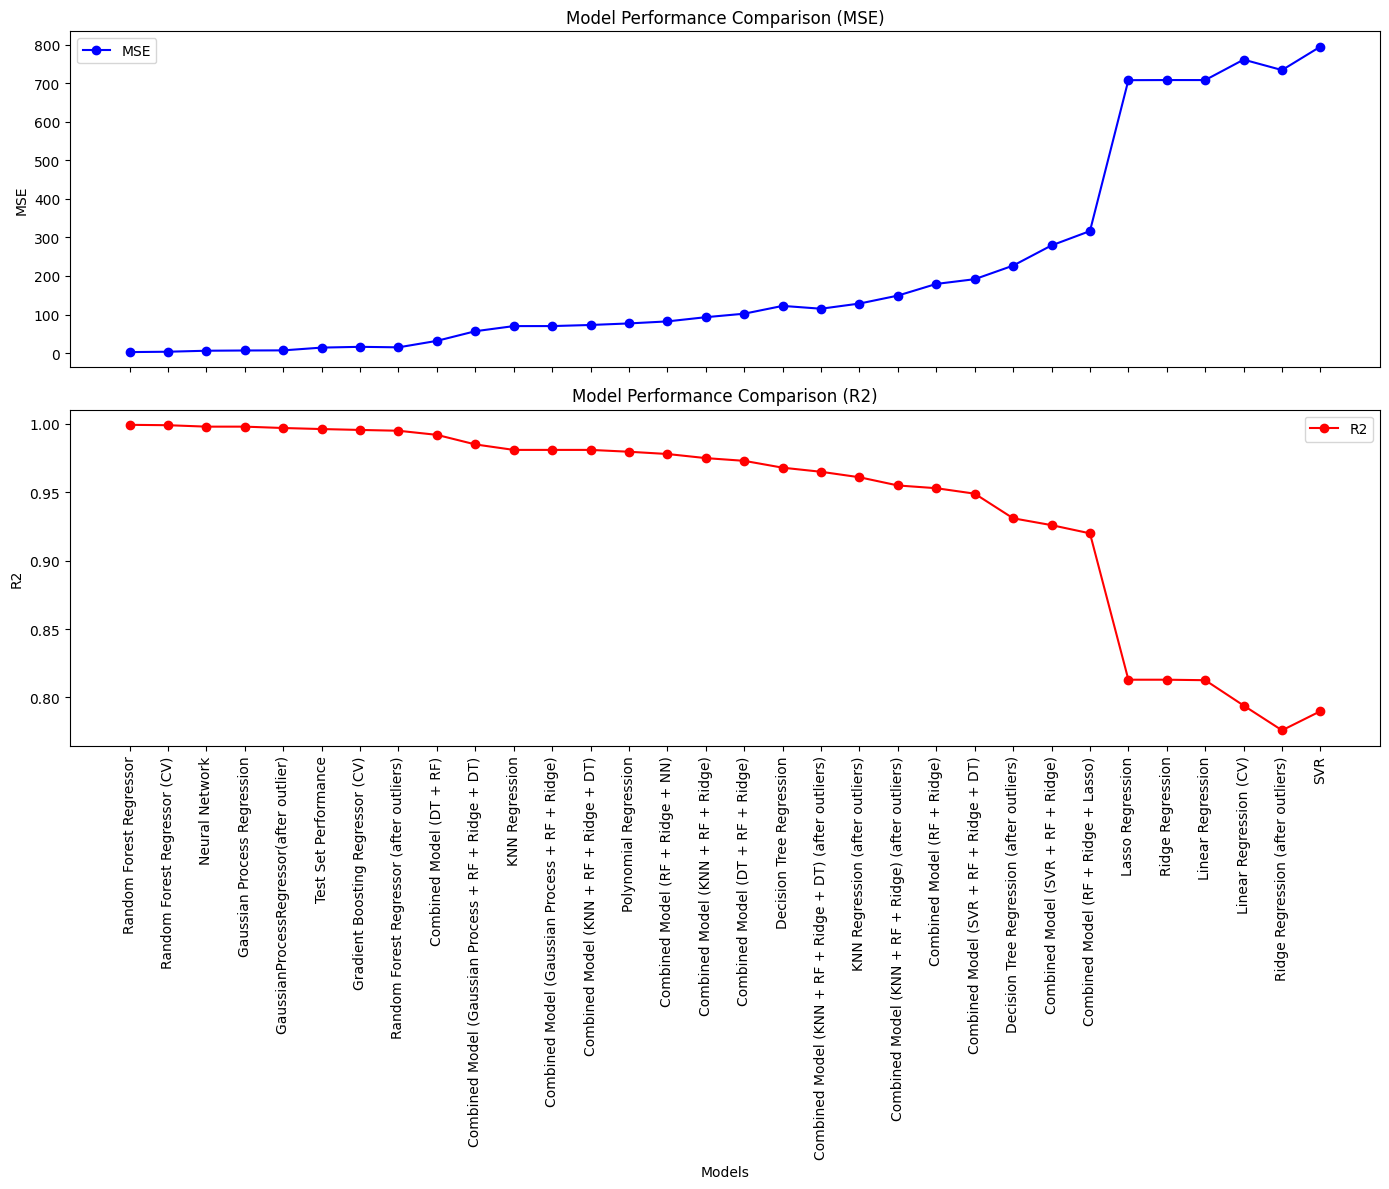

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
models = [
    "Linear Regression", "Random Forest Regressor", 
    "Linear Regression (CV)", "Random Forest Regressor (CV)", 
    "Gradient Boosting Regressor (CV)", "Test Set Performance", 
    "Ridge Regression", "Combined Model (RF + Ridge)", 
    "Neural Network", "Combined Model (RF + Ridge + NN)", 
    "Lasso Regression", "Combined Model (RF + Ridge + Lasso)", 
    "Decision Tree Regression", "Combined Model (DT + RF)", 
    "Combined Model (DT + RF + Ridge)", "KNN Regression", 
    "Combined Model (KNN + RF + Ridge)", 
    "Combined Model (KNN + RF + Ridge + DT)", 
    "KNN Regression (after outliers)", 
    "Random Forest Regressor (after outliers)", 
    "Ridge Regression (after outliers)", 
    "Decision Tree Regression (after outliers)", 
    "Combined Model (KNN + RF + Ridge) (after outliers)", 
    "Combined Model (KNN + RF + Ridge + DT) (after outliers)", 
    "SVR", "Combined Model (SVR + RF + Ridge)", 
    "Combined Model (SVR + RF + Ridge + DT)", 
    "Gaussian Process Regression", 
    "Combined Model (Gaussian Process + RF + Ridge)", 
    "Combined Model (Gaussian Process + RF + Ridge + DT)", 
    "Polynomial Regression","GaussianProcessRegressor(after outlier)"
]

mse_values = np.array([
    708.3218629119264, 2.5687374548571196, 761.3474602916151, 
    3.512834763438825, 16.236799821929484, 14.214746991305985, 
    708.358, 179.447, 6.101, 82.207, 708.057, 316.57, 
    122.434, 31.711, 102.188, 70.005, 93.123, 72.914, 
    128.512, 14.902, 734.205, 226.929, 149.140, 115.092, 
    795.123, 279.353, 191.709, 6.716, 70.069, 56.721, 
    76.93532410174635,7.023
])

r2_values = np.array([
    0.812639819900359, 0.9993205361328363, 0.7941137035204061, 
    0.9990505286892212, 0.9955888357603504, 0.996240017856553, 
    0.813, 0.953, 0.998, 0.978, 0.813, 0.92, 
    0.968, 0.992, 0.973, 0.981, 0.975, 0.981, 
    0.961, 0.995, 0.776, 0.931, 0.955, 0.965, 
    0.79, 0.926, 0.949, 0.998, 0.981, 0.985, 
    0.979649624084073,0.997
])
mse_norm = (mse_values - min(mse_values)) / (max(mse_values) - min(mse_values))
r2_norm = (r2_values - min(r2_values)) / (max(r2_values) - min(r2_values))

combined_score = mse_norm - r2_norm  

df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2': r2_values,
    'Combined Score': combined_score
})
df_sorted = df.sort_values(by='Combined Score')
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

axs[0].plot(df_sorted['Model'], df_sorted['MSE'], marker='o', color='b', label='MSE')
axs[0].set_ylabel('MSE')
axs[0].set_title('Model Performance Comparison (MSE)')
axs[0].legend()
axs[0].tick_params(axis='x', rotation=90)

axs[1].plot(df_sorted['Model'], df_sorted['R2'], marker='o', color='r', label='R2')
axs[1].set_ylabel('R2')
axs[1].set_title('Model Performance Comparison (R2)')
axs[1].legend()
axs[1].tick_params(axis='x', rotation=90)

plt.xlabel('Models')
plt.tight_layout()
plt.show()


In [114]:
print(f"Length of 'models': {len(models)}")
print(f"Length of 'unique_mse_values': {len(unique_mse_values)}")
print(f"Length of 'unique_r2_values': {len(unique_r2_values)}")
print(f"Length of 'combined_score': {len(combined_score)}")


Length of 'models': 32


NameError: name 'unique_mse_values' is not defined

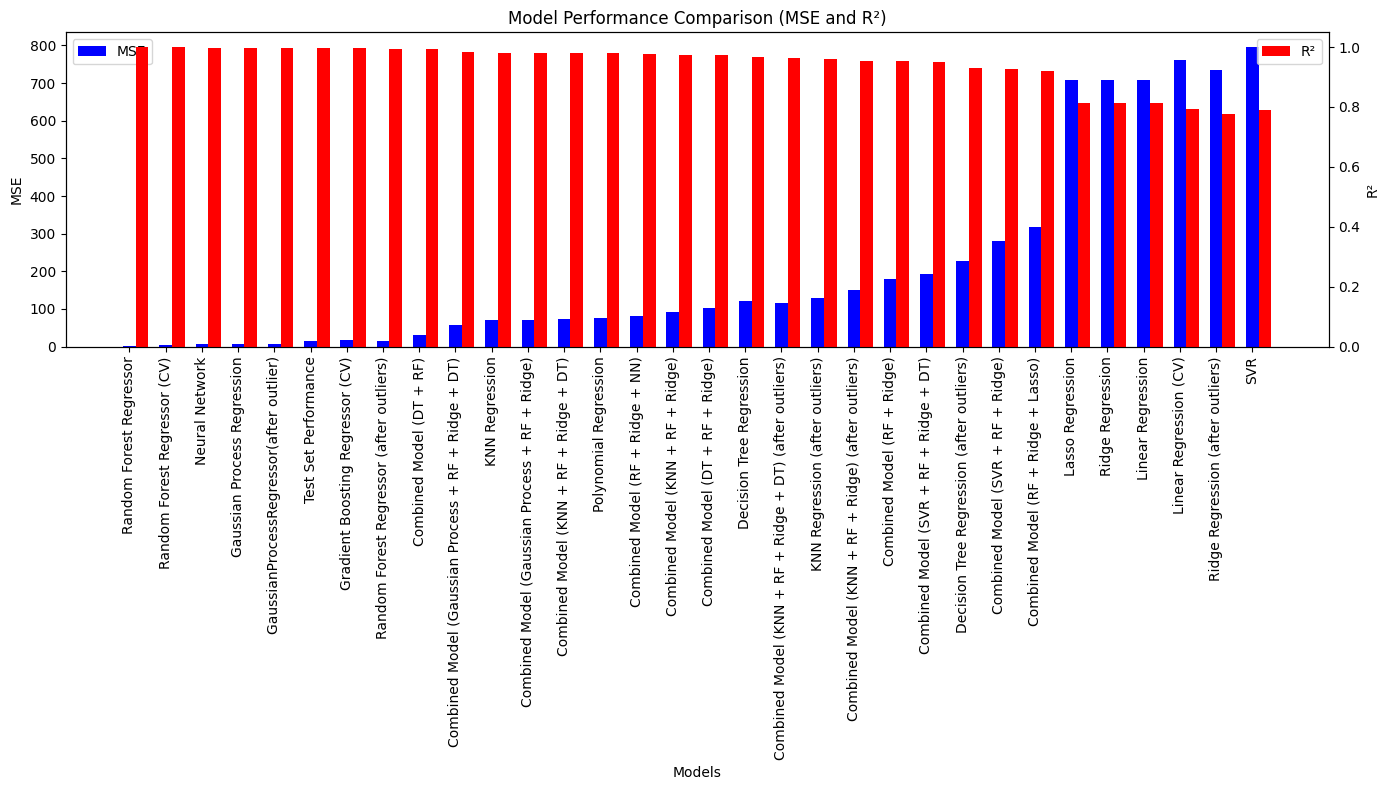

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
models = [
    "Linear Regression", "Random Forest Regressor", 
    "Linear Regression (CV)", "Random Forest Regressor (CV)", 
    "Gradient Boosting Regressor (CV)", "Test Set Performance", 
    "Ridge Regression", "Combined Model (RF + Ridge)", 
    "Neural Network", "Combined Model (RF + Ridge + NN)", 
    "Lasso Regression", "Combined Model (RF + Ridge + Lasso)", 
    "Decision Tree Regression", "Combined Model (DT + RF)", 
    "Combined Model (DT + RF + Ridge)", "KNN Regression", 
    "Combined Model (KNN + RF + Ridge)", 
    "Combined Model (KNN + RF + Ridge + DT)", 
    "KNN Regression (after outliers)", 
    "Random Forest Regressor (after outliers)", 
    "Ridge Regression (after outliers)", 
    "Decision Tree Regression (after outliers)", 
    "Combined Model (KNN + RF + Ridge) (after outliers)", 
    "Combined Model (KNN + RF + Ridge + DT) (after outliers)", 
    "SVR", "Combined Model (SVR + RF + Ridge)", 
    "Combined Model (SVR + RF + Ridge + DT)", 
    "Gaussian Process Regression", 
    "Combined Model (Gaussian Process + RF + Ridge)", 
    "Combined Model (Gaussian Process + RF + Ridge + DT)", 
    "Polynomial Regression","GaussianProcessRegressor(after outlier)"
]

unique_mse_values = np.array([
    708.3218629119264, 2.5687374548571196, 761.3474602916151, 
    3.512834763438825, 16.236799821929484, 14.214746991305985, 
    708.358, 179.447, 6.101, 82.207, 708.057, 316.57, 
    122.434, 31.711, 102.188, 70.005, 93.123, 72.914, 
    128.512, 14.902, 734.205, 226.929, 149.140, 115.092, 
    795.123, 279.353, 191.709, 6.716, 70.069, 56.721, 
    76.93532410174635,7.023
])

unique_r2_values = np.array([
    0.812639819900359, 0.9993205361328363, 0.7941137035204061, 
    0.9990505286892212, 0.9955888357603504, 0.996240017856553, 
    0.813, 0.953, 0.998, 0.978, 0.813, 0.92, 
    0.968, 0.992, 0.973, 0.981, 0.975, 0.981, 
    0.961, 0.995, 0.776, 0.931, 0.955, 0.965, 
    0.79, 0.926, 0.949, 0.998, 0.981, 0.985, 
    0.979649624084073,0.997
])


mse_norm = (mse_values - min(mse_values)) / (max(mse_values) - min(mse_values))
r2_norm = (r2_values - min(r2_values)) / (max(r2_values) - min(r2_values))

combined_score = mse_norm - r2_norm
df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R2': r2_values,
    'Combined Score': combined_score
})

df_sorted = df.sort_values(by='Combined Score')

fig, ax1 = plt.subplots(figsize=(14, 8))

bar_width = 0.35
index = np.arange(len(df_sorted))

bar1 = ax1.bar(index, df_sorted['MSE'], bar_width, label='MSE', color='b')
ax1.set_ylabel('MSE')
ax1.set_xlabel('Models')
ax1.set_title('Model Performance Comparison (MSE and R²)')
ax1.set_xticks(index)
ax1.set_xticklabels(df_sorted['Model'], rotation=90)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width, df_sorted['R2'], bar_width, label='R²', color='r')
ax2.set_ylabel('R²')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_excel('ANN complete matrix for caffeine.xlsx', sheet_name='Sheet1')
target_column = 'Caffeine degradation amount '

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

X = df.drop(target_column, axis=1)
y = df[target_column]

# Encoding and Scaling
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gaussian Process Regressor
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gp_regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2, random_state=42)
gp_regressor.fit(X_train, y_train)

# Predictions
y_pred_gp, sigma = gp_regressor.predict(X_test, return_std=True)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

y_pred_combined_gp_rf_ridge = (y_pred_gp + y_pred_rf + y_pred_ridge) / 3

y_pred_combined_gp_rf_ridge_dt = (y_pred_gp + y_pred_rf + y_pred_ridge + y_pred_dt) / 4

mse_gp = mean_squared_error(y_test, y_pred_gp)
r2_gp = r2_score(y_test, y_pred_gp)

print("Gaussian Process Regression(after outlier):")
print(f"Mean Squared Error (MSE): {mse_gp:.3f}")
print(f"R-squared (R²) Score: {r2_gp:.3f}\n")






Gaussian Process Regression(after outlier):
Mean Squared Error (MSE): 7.023
R-squared (R²) Score: 0.997



c:\Users\SREENITHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:434: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
